<a href="https://colab.research.google.com/github/1V1a1l8/1V1a1l8/blob/main/ProyectoIntegrador/Avance5_Equipo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Introduccion**

Este documento tiene como objetivo verificar la existencia de una relación (positiva o negativa) entre el estudio de la educación media superior en línea y los niveles de ansiedad social, enfocado en la comparación de estudiantes de medicina con y sin estudios medios superiores en línea. La ansiedad social es definida como el medio o la ansiedad intensa en una o más situaciones sociales en las que el sujeto está expuesto a una posible evaluación por parte de otros sujetos como lo puede ser una conversación, ser visto por otros o tener que realizar actividades frente a otros.

Se espera que los resultados encontrados sirvan para que los médicos puedan diseñar programas, políticas o mecanismos de acción para reducir los niveles de ansiedad social entre los estudiantes. La evidencia empírica muestra que esta condición puede tener impactos relevantes en la calidad de vida de los estudiantes, esto al interferir en las relaciones interpersonales y afectando el desempeño en el trabajo o actividades académicas.

Para cuantificar la relación entre la educación en línea y los niveles de ansiedad, se hace uso de información recopilada por encuestas realizadas por parte del equipo médico de la Universidad Autónoma de Nuevo León, y se hará uso de algoritmos no supervisados para generar agrupaciones (K-means y PCA), para posteriormente modelar econométricamente las relaciones entre la educación en línea y los niveles de ansiedad. Se busca encontrar características sociodemográficas relevantes y verificar si los estudiantes con educación media en línea de verdad tienen mayores niveles de ansiedad o no.

El documento tiene la siguiente composición: en el primer capítulo se hará una revisión de la literatura relacionada con la ansiedad social, así como de los indicadores existentes y que serán usados para todos los análisis para entender de manera integral el concepto. Adicionalmente, se revisará alguna evidencia empírica para tener mayor contexto.

En el segundo capítulo, se presentan las características de los individuos encuestados, procediendo primero a realizar las agrupaciones con los algoritmos no supervisados y después se realiza un análisis de naturaleza descriptiva para cada agrupación generada con base en sus diversas características.
En el capítulo tres, se estiman las elasticidades con base en el tipo de educación media superior realizada, en línea o no, y las distintas medidas de ansiedad. También, se explica la forma en la que se procede empíricamente para después interpretar y analizar los resultados obtenidos.
Finalmente, en el capítulo cuatro se presentan las conclusiones obtenidas del trabajo de investigación.


#**Analisis por Estudios**

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import statsmodels.api as sm
import statsmodels.formula.api as smf


# ignorar warnings
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')

In [137]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [138]:
df = pd.read_excel('/content/drive/MyDrive/ProyectoIntegrador/Avance_4/base_protocolo.xlsx')
df.head()

,Código,CI,Edad,Año,Línea,MA,SON,ES,PD,CRI,...,TBM,IEI,MPC,AHG,TMM,MDO,DIG,DVS,RBF,TOTAL BECK
0,1,1,21,5,2,1,0,0,0,1,...,0,0,0,0,2,0,0,0,0,10
1,2,1,25,5,2,0,0,1,1,2,...,0,1,0,0,0,0,1,0,0,10
2,3,1,19,1,1,3,4,4,4,4,...,1,3,0,1,1,2,3,1,2,41
3,4,1,18,1,1,2,2,2,2,1,...,0,0,1,1,2,0,0,0,0,9
4,5,1,19,2,1,1,0,2,2,1,...,3,2,1,0,0,0,2,0,0,26


In [139]:
df['Fobia_Social'] = df['TOTAL SPIN'].apply(lambda x: 1 if x >= 41 else 0)
df['Ansiedad_Generalizada'] = df['TOTAL GAD-7'].apply(lambda x: 1 if x >= 10 else 0)
df['Ansiedad_Beck'] = df['TOTAL BECK'].apply(lambda x: 1 if x >= 22 else 0)
df.head()

,Código,CI,Edad,Año,Línea,MA,SON,ES,PD,CRI,...,AHG,TMM,MDO,DIG,DVS,RBF,TOTAL BECK,Fobia_Social,Ansiedad_Generalizada,Ansiedad_Beck
0,1,1,21,5,2,1,0,0,0,1,...,0,2,0,0,0,0,10,0,0,0
1,2,1,25,5,2,0,0,1,1,2,...,0,0,0,1,0,0,10,0,0,0
2,3,1,19,1,1,3,4,4,4,4,...,1,1,2,3,1,2,41,1,1,1
3,4,1,18,1,1,2,2,2,2,1,...,1,2,0,0,0,0,9,0,0,0
4,5,1,19,2,1,1,0,2,2,1,...,0,0,0,2,0,0,26,0,0,1


In [140]:
df.columns

Index(['Código', 'CI', 'Edad', 'Año', 'Línea', 'MA', 'SON', 'ES', 'PD', 'CRI',
       'VR', 'TR', 'EF', 'ECA', 'HD', 'HP', 'EC', 'PC', 'GM', 'MM', 'PA', 'TS',
       'TOTAL SPIN', 'NP', 'P', 'PD.1', 'DR', 'I', 'IR', 'MT', 'TOTAL GAD-7',
       'TPE', 'ACO', 'TBP', 'IDR', 'TMR', 'MR', 'CFA', 'INT', 'ATZ', 'NRV',
       'BLQ', 'TBM', 'IEI', 'MPC', 'AHG', 'TMM', 'MDO', 'DIG', 'DVS', 'RBF',
       'TOTAL BECK', 'Fobia_Social', 'Ansiedad_Generalizada', 'Ansiedad_Beck'],
      dtype='object')

## **K-means Escala SPIN**

In [141]:
# Segmentación de la escala SPIN
df_spin = df[['Edad', 'Año', 'Línea', 'MA', 'SON', 'ES', 'PD', 'CRI', 'VR', 'TR', 'EF',
              'ECA', 'HD', 'HP', 'EC', 'PC', 'GM', 'MM', 'PA', 'TS', 'TOTAL SPIN']]

# Segmentación de clases
# Linea = 1
spin_linea_1 = df_spin[df_spin['Línea'] == 1][['Edad', 'Año', 'MA', 'SON', 'ES', 'PD', 'CRI', 'VR', 'TR',
                                               'EF', 'ECA', 'HD', 'HP', 'EC', 'PC', 'GM', 'MM', 'PA', 'TS']]
# Linea = 2
spin_linea_2 = df_spin[df_spin['Línea'] == 2][['Edad', 'Año', 'MA', 'SON', 'ES', 'PD', 'CRI', 'VR', 'TR',
                                               'EF', 'ECA', 'HD', 'HP', 'EC', 'PC', 'GM', 'MM', 'PA', 'TS']]

In [142]:
# Estandarización de datos
scaler = StandardScaler()

spin_linea_1_scaled = scaler.fit_transform(spin_linea_1)
df_spin_linea_1_scaled = pd.DataFrame(spin_linea_1_scaled, columns=spin_linea_1.columns)

spin_linea_2_scaled = scaler.fit_transform(spin_linea_2)
df_spin_linea_2_scaled = pd.DataFrame(spin_linea_2_scaled, columns=spin_linea_2.columns)

### Linea 1 (preparatoria online)

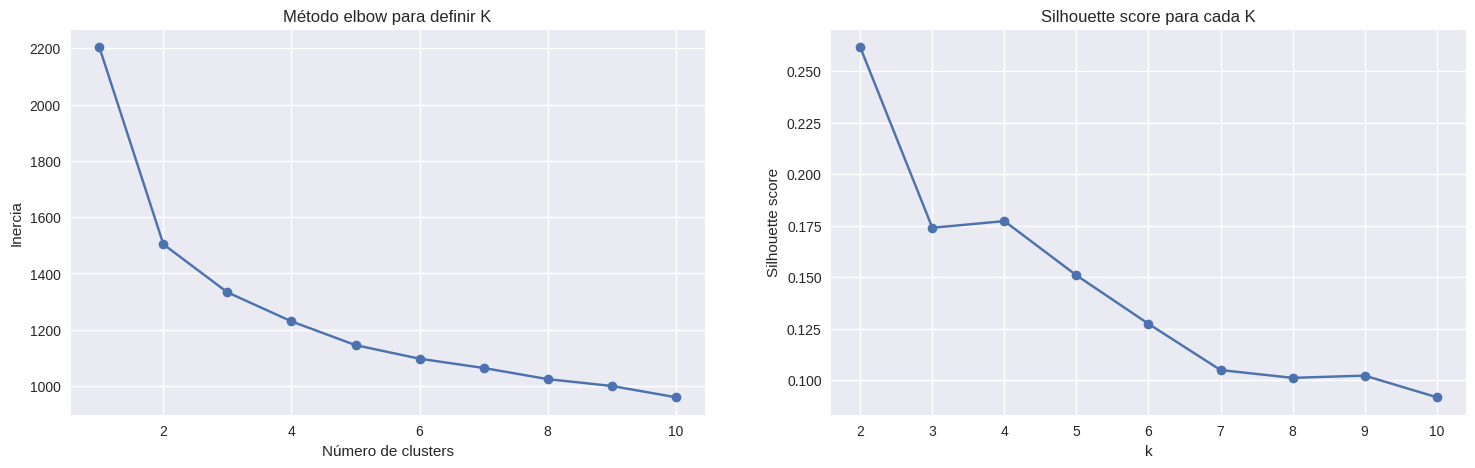

In [143]:
# Inercia y Silhouette score
inertias_spin = []
silhouette_scores = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_spin_linea_1_scaled)
    inertias_spin.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(df_spin_linea_1_scaled, kmeans.labels_))

# Graficas Elbow y Silhouette score
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), inertias_spin, marker='o')
plt.title('Método elbow para definir K')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette score para cada K')
plt.xlabel('k')
plt.ylabel('Silhouette score')

plt.show()

### PCA

Varianza explicada por componente:
 [0.44197279 0.09327236 0.07544092 0.05695066 0.04936508 0.0427597
 0.03518635 0.03258825 0.02580255 0.0237558  0.02046237 0.01872439
 0.01601495 0.01522808 0.01409743 0.01226502 0.01048542 0.00864035
 0.00698753]

Varianza explicada acumulada:
 [0.44197279 0.53524515 0.61068607 0.66763673 0.71700181 0.75976151
 0.79494786 0.82753611 0.85333866 0.87709446 0.89755682 0.91628121
 0.93229617 0.94752425 0.96162168 0.9738867  0.98437212 0.99301247
 1.        ]


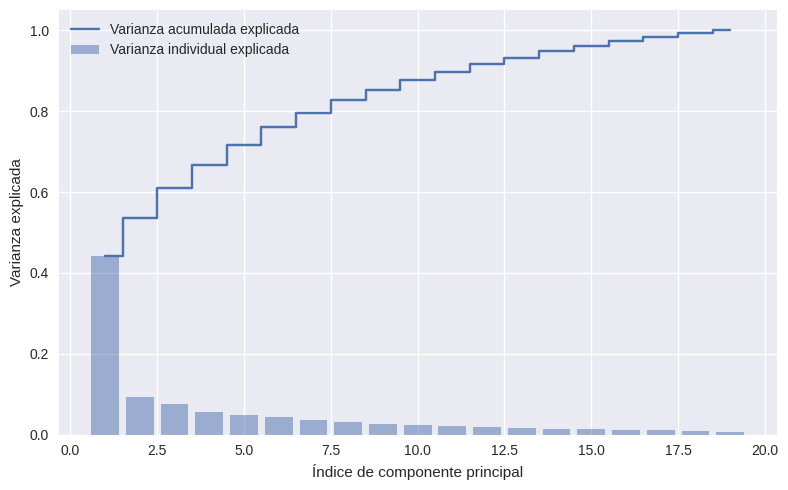

In [144]:
# PCA
pca_full = PCA()
pca_full.fit(df_spin_linea_1_scaled)

# varianza explicada
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Print varianza por componente
print("Varianza explicada por componente:\n", explained_variance_ratio)

# Print varianza acumulada
print("\nVarianza explicada acumulada:\n", cumulative_explained_variance)

# grafica
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Varianza individual explicada')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Varianza acumulada explicada')
plt.ylabel('Varianza explicada')
plt.xlabel('Índice de componente principal')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

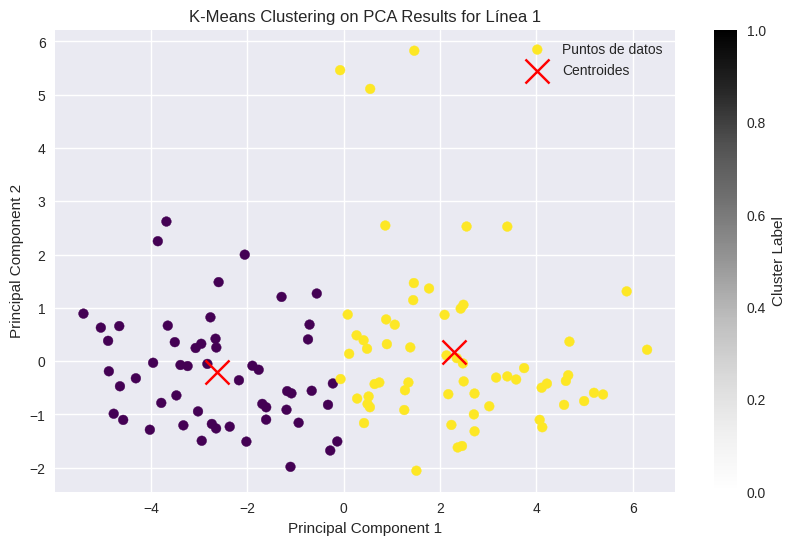

In [145]:
# Aplicar PCA con 8 componentes
pca_spin_linea_1 = PCA(n_components=8)
spin_linea_1_pca = pca_spin_linea_1.fit_transform(df_spin_linea_1_scaled)

# K means con 2 clusters para linea 1
kmeans_spin_linea_1 = KMeans(n_clusters=2, random_state=42)
clusters_spin_linea_1 = kmeans_spin_linea_1.fit_predict(spin_linea_1_pca)

# Grafica PCA Clusters
plt.figure(figsize=(10, 6))
plt.scatter(spin_linea_1_pca[:, 0], spin_linea_1_pca[:, 1], c=clusters_spin_linea_1, cmap='viridis', marker='o', label='Puntos de datos')
plt.scatter(kmeans_spin_linea_1.cluster_centers_[:, 0], kmeans_spin_linea_1.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Centroides')
plt.title('K-Means Clustering on PCA Results for Línea 1')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()

### Diagrama Silhouette

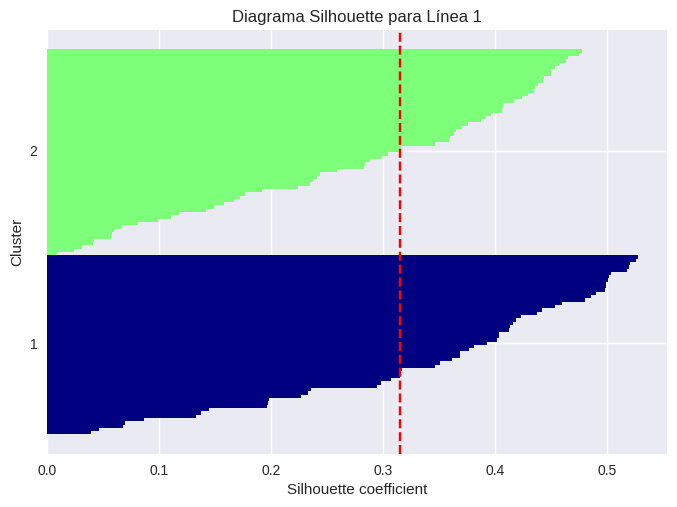

In [146]:
cluster_labels = np.unique(clusters_spin_linea_1)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(spin_linea_1_pca, clusters_spin_linea_1, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[clusters_spin_linea_1 == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.title('Diagrama Silhouette para Línea 1')
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.show()

### Linea 2 (preparatoria presencial)

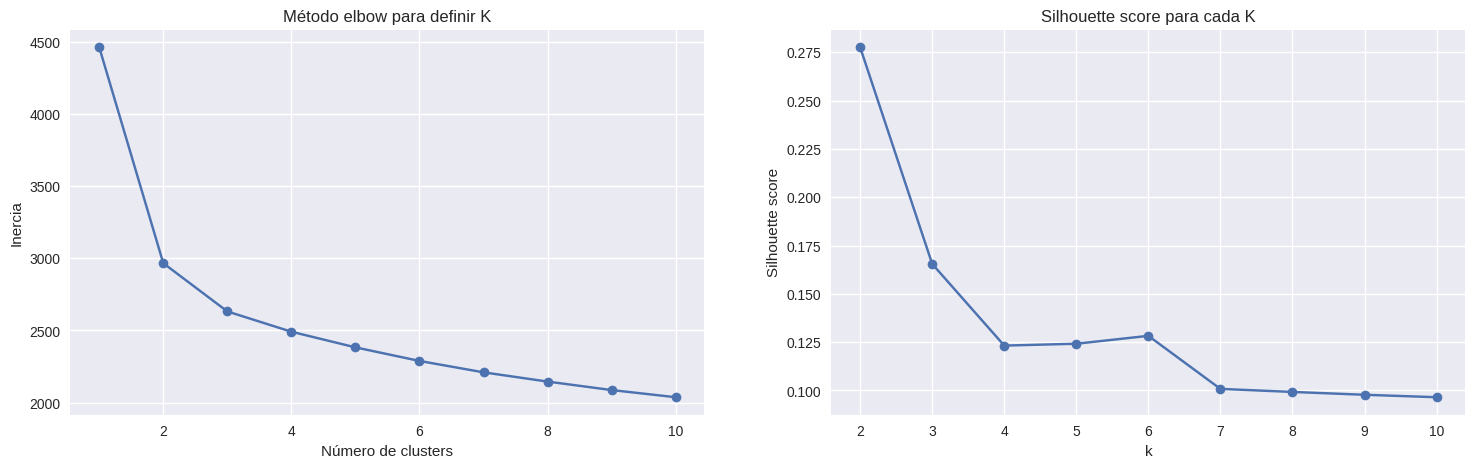

In [147]:
# Inercia y Silhouette score
inertias_spin = []
silhouette_scores = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_spin_linea_2_scaled)
    inertias_spin.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(df_spin_linea_2_scaled, kmeans.labels_))

# Graficas Elbow y Silhouette score
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), inertias_spin, marker='o')
plt.title('Método elbow para definir K')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette score para cada K')
plt.xlabel('k')
plt.ylabel('Silhouette score')

plt.show()

### PCA

Varianza explicada por componente:
 [0.47280824 0.08348499 0.0712026  0.04612078 0.04300073 0.04009433
 0.03364245 0.0287065  0.02640643 0.02479224 0.02308616 0.0205912
 0.01638618 0.01428179 0.01374852 0.01320822 0.01004359 0.00942312
 0.00897193]

Varianza explicada acumulada:
 [0.47280824 0.55629322 0.62749583 0.67361661 0.71661734 0.75671167
 0.79035411 0.81906062 0.84546704 0.87025928 0.89334545 0.91393665
 0.93032283 0.94460462 0.95835314 0.97156136 0.98160495 0.99102807
 1.        ]


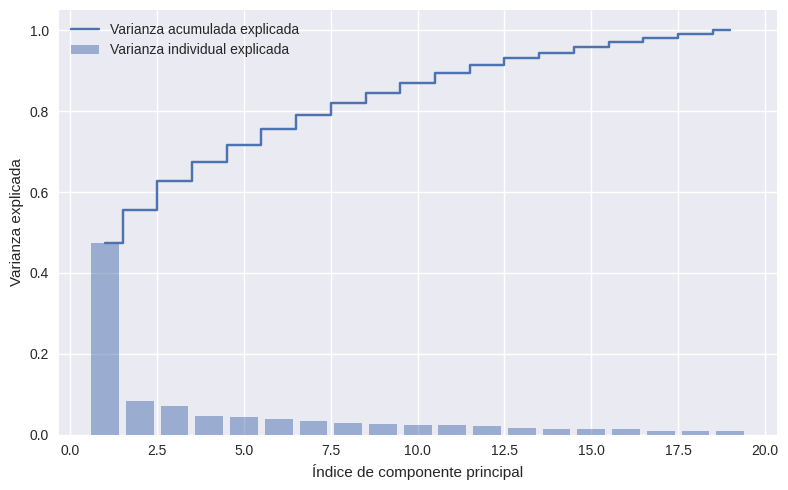

In [148]:
# PCA
pca_full = PCA()
pca_full.fit(df_spin_linea_2_scaled)

# varianza explicada
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Print varianza por componente
print("Varianza explicada por componente:\n", explained_variance_ratio)

# Print varianza acumulada
print("\nVarianza explicada acumulada:\n", cumulative_explained_variance)

# grafica
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Varianza individual explicada')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Varianza acumulada explicada')
plt.ylabel('Varianza explicada')
plt.xlabel('Índice de componente principal')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

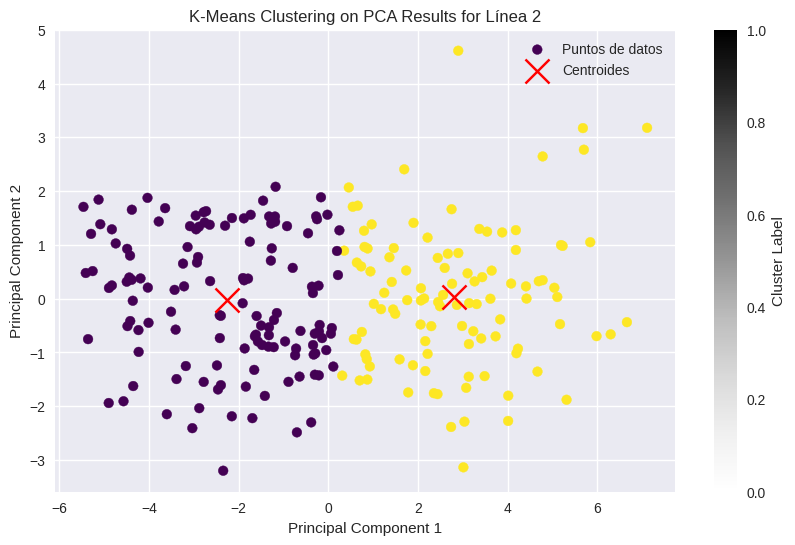

In [149]:
# Aplicar PCA con 8 componentes
pca_spin_linea_2 = PCA(n_components=8)
spin_linea_2_pca = pca_spin_linea_2.fit_transform(df_spin_linea_2_scaled)

# K means con 2 clusters para linea 1
kmeans_spin_linea_2 = KMeans(n_clusters=2, random_state=42)
clusters_spin_linea_2 = kmeans_spin_linea_2.fit_predict(spin_linea_2_pca)

# Grafica PCA Clusters
plt.figure(figsize=(10, 6))
plt.scatter(spin_linea_2_pca[:, 0], spin_linea_2_pca[:, 1], c=clusters_spin_linea_2, cmap='viridis', marker='o', label='Puntos de datos')
plt.scatter(kmeans_spin_linea_2.cluster_centers_[:, 0], kmeans_spin_linea_2.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Centroides')
plt.title('K-Means Clustering on PCA Results for Línea 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()

### Diagrama Silhouette

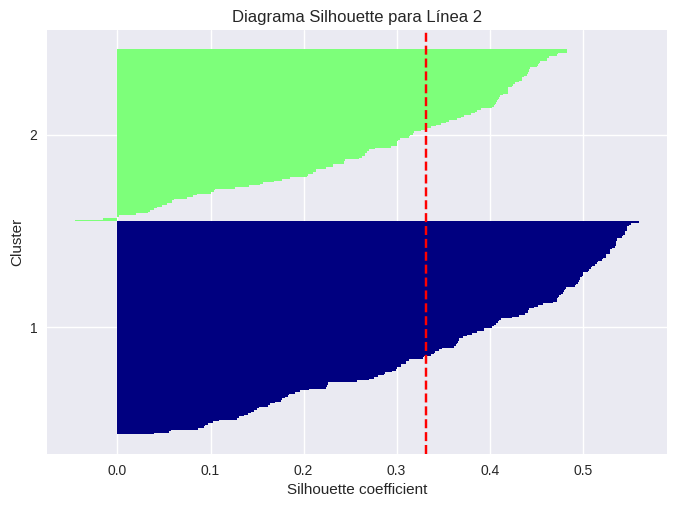

In [150]:
cluster_labels = np.unique(clusters_spin_linea_2)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(spin_linea_2_pca, clusters_spin_linea_2, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[clusters_spin_linea_2 == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.title('Diagrama Silhouette para Línea 2')
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.show()

### Análisis de Clusters SPIN

Asignamos Clusters al dataframe original SPIN

In [151]:
# Linea 1, incluyendo SPIN total
spin_lin1_full = df_spin[df_spin['Línea'] == 1][['Edad', 'Año', 'MA', 'SON', 'ES', 'PD', 'CRI', 'VR', 'TR', 'EF',
                                                 'ECA', 'HD', 'HP', 'EC', 'PC', 'GM', 'MM', 'PA', 'TS', 'TOTAL SPIN']]

# Linea 2, incluyendo SPIN total
spin_lin2_full = df_spin[df_spin['Línea'] == 2][['Edad', 'Año', 'MA', 'SON', 'ES', 'PD', 'CRI', 'VR', 'TR', 'EF',
                                                 'ECA', 'HD', 'HP', 'EC', 'PC', 'GM', 'MM', 'PA', 'TS', 'TOTAL SPIN']]

# Asignar clusters
spin_lin1_full['Cluster'] = clusters_spin_linea_1
spin_lin2_full['Cluster'] = clusters_spin_linea_2

**Comparamos la distribución de puntaje total SPIN para cada cluster**

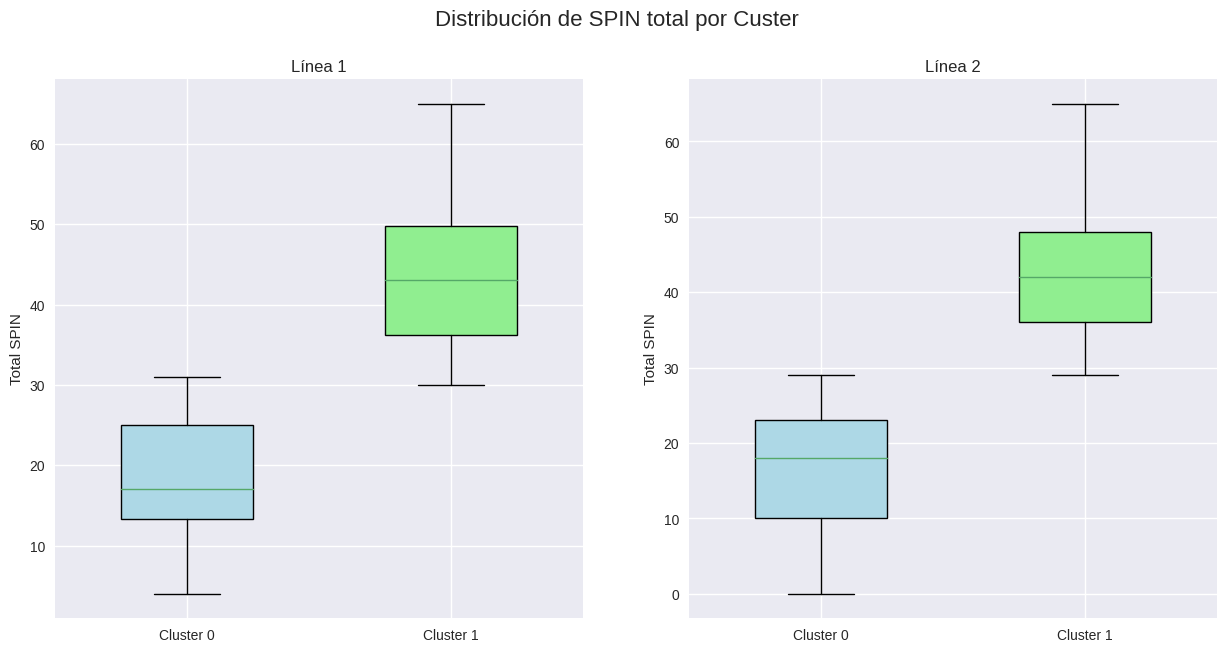

In [152]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.boxplot([spin_lin1_full[spin_lin1_full['Cluster'] == 0]['TOTAL SPIN']], positions=[0], widths=0.5,
            patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.boxplot([spin_lin1_full[spin_lin1_full['Cluster'] == 1]['TOTAL SPIN']], positions=[1], widths=0.5,
            patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Línea 1')
plt.ylabel('Total SPIN')
plt.xticks([0, 1], ['Cluster 0', 'Cluster 1'])

plt.subplot(1, 2, 2)
plt.boxplot([spin_lin2_full[spin_lin2_full['Cluster'] == 0]['TOTAL SPIN']], positions=[0], widths=0.5,
            patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.boxplot([spin_lin2_full[spin_lin2_full['Cluster'] == 1]['TOTAL SPIN']], positions=[1], widths=0.5,
            patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Línea 2')
plt.ylabel('Total SPIN')
plt.xticks([0, 1], ['Cluster 0', 'Cluster 1'])
plt.suptitle('Distribución de SPIN total por Custer', fontsize=16)

plt.show()

**Observamos el puntaje promedio para cada pregunta del cuestionario SPIN**

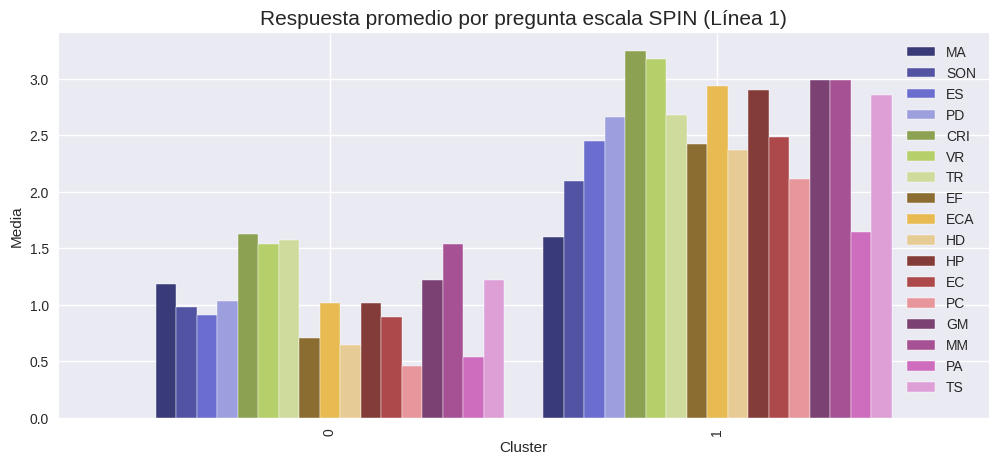

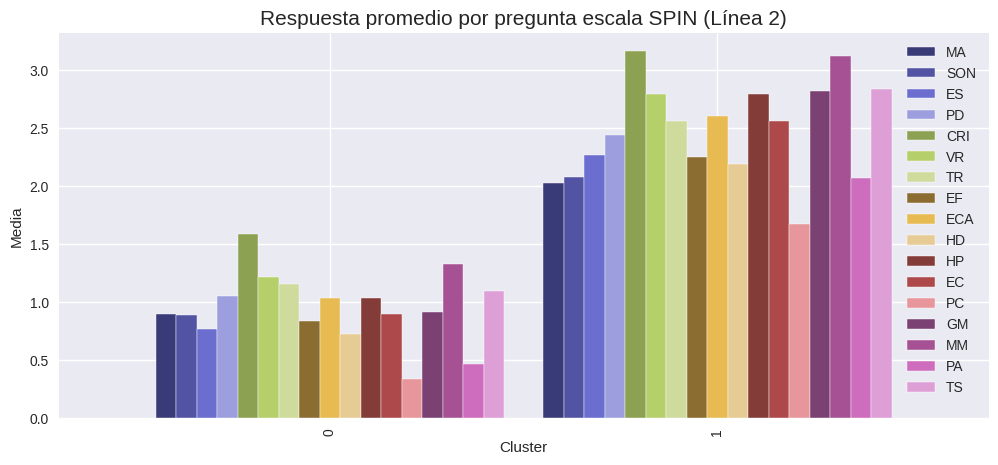

In [153]:
(spin_lin1_full
 .drop(columns=['Edad', 'Año', 'TOTAL SPIN'])
 .groupby('Cluster')
 .mean()
 .plot(kind='bar', figsize=(12, 5), width=0.9, colormap='tab20b', edgecolor='white')
)
plt.title('Respuesta promedio por pregunta escala SPIN (Línea 1)', fontsize=15)
plt.ylabel('Media')

(spin_lin2_full
 .drop(columns=['Edad', 'Año', 'TOTAL SPIN'])
 .groupby('Cluster')
 .mean()
 .plot(kind='bar', figsize=(12, 5), width=0.9, colormap='tab20b', edgecolor='white')
)
plt.title('Respuesta promedio por pregunta escala SPIN (Línea 2)', fontsize=15)
plt.ylabel('Media')

plt.show()

### Observaciones escala SPIN

Los clusters generados por el algoritmo K-means muestran una clara separación con respecto a la puntuación total de la escala SPIN.

Por ejemplo, la gráfica boxplot nos muestra en ambos grupos (Línea 1 y Línea 2) que las puntuaciones del "cluster 1" se encuentran dentro del intervalo de "población clínica" para el diagnostico de Fobia Social.

Recordamos los puntos de corte previamente establecidos a considerar:

* Población normal: 12.1 (+/- 9.3)
* Población clínica: 41.1 (+/- 10.2)





## **K-means Escala GAD-7**

In [154]:
# Segmentación de la escala GAD-7
df_gad= df[['Edad', 'Año', 'Línea', 'NP', 'P', 'PD', 'DR', 'I', 'IR', 'MT',
               'TOTAL GAD-7']]

# Segmentación de clases
# Linea = 1
gad_linea_1 = df_gad[df_gad['Línea'] == 1][['Edad', 'Año', 'NP', 'P', 'PD', 'DR', 'I', 'IR', 'MT']]
# Linea = 2
gad_linea_2 = df_gad[df_gad['Línea'] == 2][['Edad', 'Año', 'NP', 'P', 'PD', 'DR', 'I', 'IR', 'MT']]

In [155]:
# Estandarización de datos
scaler = StandardScaler()

gad_linea_1_scaled = scaler.fit_transform(gad_linea_1)
df_gad_linea_1_scaled = pd.DataFrame(gad_linea_1_scaled, columns=gad_linea_1.columns)

gad_linea_2_scaled = scaler.fit_transform(gad_linea_2)
df_gad_linea_2_scaled = pd.DataFrame(gad_linea_2_scaled, columns=gad_linea_2.columns)

### Linea 1 (preparatoria online)

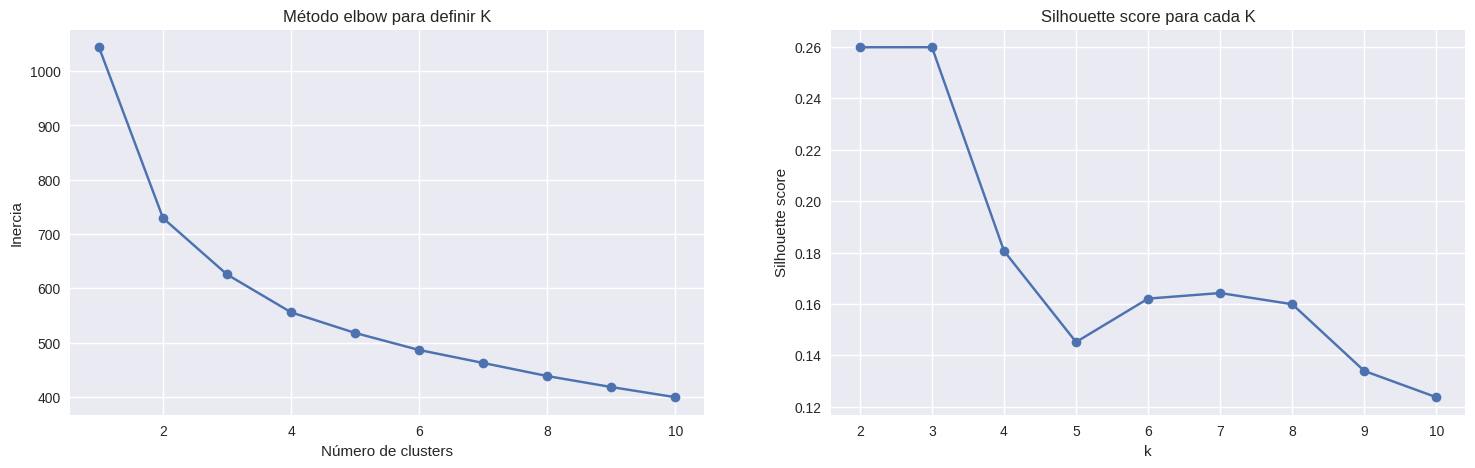

In [156]:
# Inercia y Silhouette score
inertias_gad = []
silhouette_scores = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_gad_linea_1_scaled)
    inertias_gad.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(df_gad_linea_1_scaled, kmeans.labels_))

# Graficas Elbow y Silhouette score
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), inertias_gad, marker='o')
plt.title('Método elbow para definir K')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette score para cada K')
plt.xlabel('k')
plt.ylabel('Silhouette score')

plt.show()

### PCA

Varianza explicada por componente:
 [0.41418705 0.18441282 0.10324465 0.07842633 0.05919568 0.05308623
 0.05032961 0.03433494 0.02278269]

Varianza explicada acumulada:
 [0.41418705 0.59859987 0.70184452 0.78027085 0.83946653 0.89255276
 0.94288237 0.97721731 1.        ]


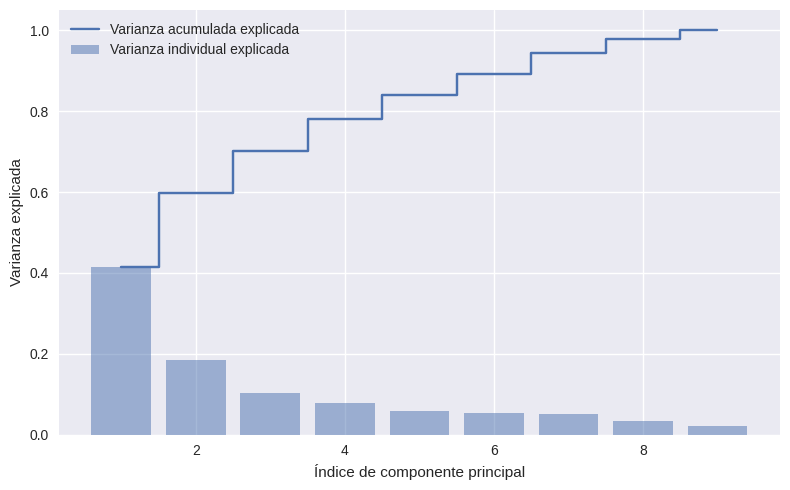

In [157]:
# PCA
pca_full = PCA()
pca_full.fit(df_gad_linea_1_scaled)

# varianza explicada
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Print varianza por componente
print("Varianza explicada por componente:\n", explained_variance_ratio)

# Print varianza acumulada
print("\nVarianza explicada acumulada:\n", cumulative_explained_variance)

# grafica
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Varianza individual explicada')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Varianza acumulada explicada')
plt.ylabel('Varianza explicada')
plt.xlabel('Índice de componente principal')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

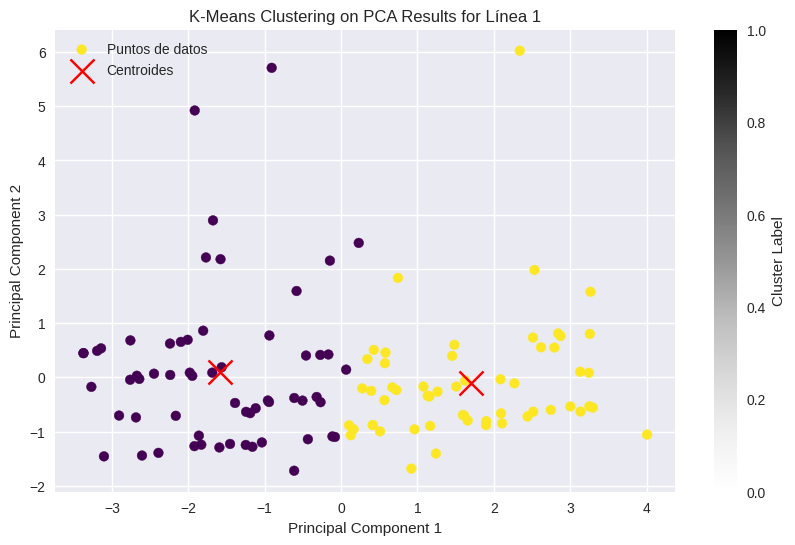

In [158]:
# Aplicar PCA con 5 componentes
pca_gad_linea_1 = PCA(n_components=5)
gad_linea_1_pca = pca_gad_linea_1.fit_transform(df_gad_linea_1_scaled)

# K means con 3 clusters para linea 1
kmeans_gad_linea_1 = KMeans(n_clusters=2, random_state=42)
clusters_gad_linea_1 = kmeans_gad_linea_1.fit_predict(gad_linea_1_pca)

# Grafica PCA Clusters
plt.figure(figsize=(10, 6))
plt.scatter(gad_linea_1_pca[:, 0], gad_linea_1_pca[:, 1], c=clusters_gad_linea_1, cmap='viridis', marker='o', label='Puntos de datos')
plt.scatter(kmeans_gad_linea_1.cluster_centers_[:, 0], kmeans_gad_linea_1.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Centroides')
plt.title('K-Means Clustering on PCA Results for Línea 1')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()

### Diagrama Silhouette

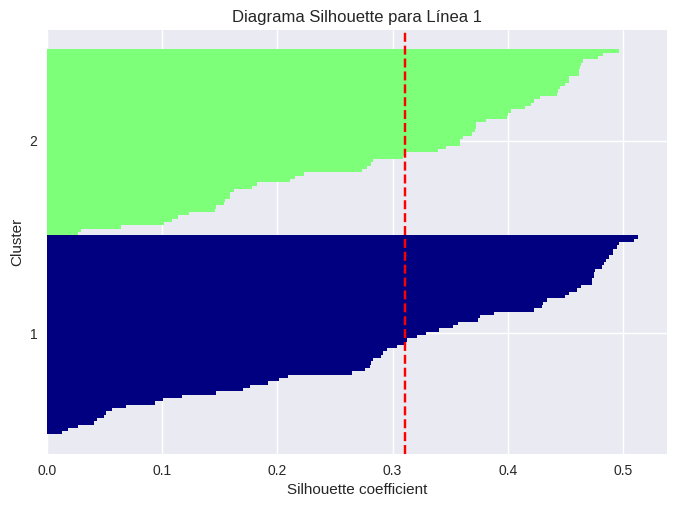

In [159]:
cluster_labels = np.unique(clusters_gad_linea_1)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(gad_linea_1_pca, clusters_gad_linea_1, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[clusters_gad_linea_1 == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.title('Diagrama Silhouette para Línea 1')
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.show()

### Linea 2 (preparatoria presencial)

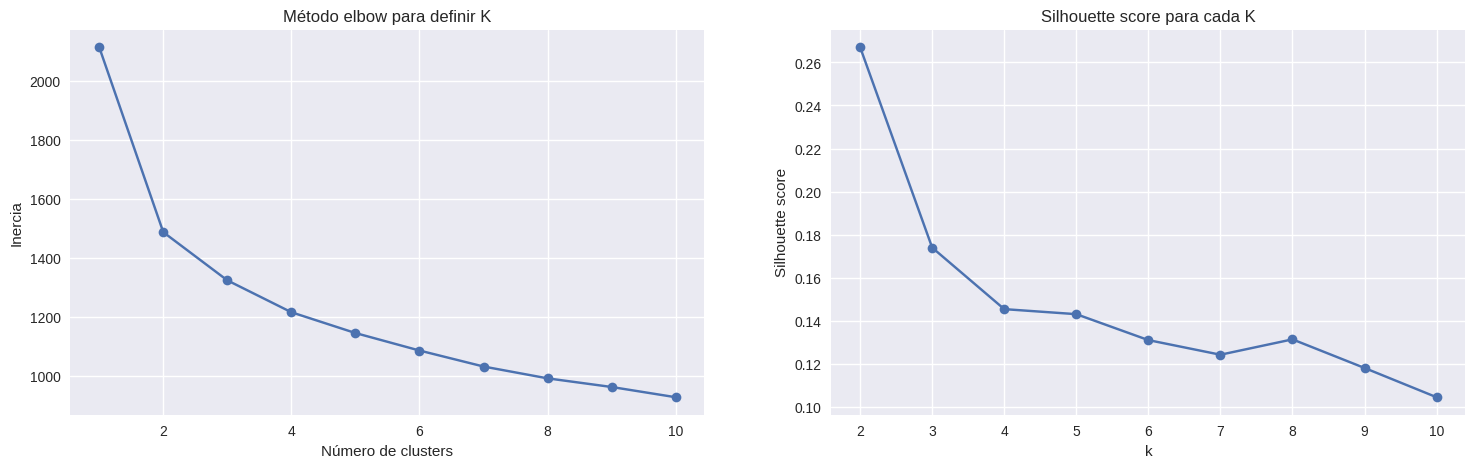

In [160]:
# Inercia y Silhouette score
inertias_gad = []
silhouette_scores = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_gad_linea_2_scaled)
    inertias_gad.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(df_gad_linea_2_scaled, kmeans.labels_))

# Graficas Elbow y Silhouette score
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), inertias_gad, marker='o')
plt.title('Método elbow para definir K')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette score para cada K')
plt.xlabel('k')
plt.ylabel('Silhouette score')

plt.show()

### PCA

Varianza explicada por componente:
 [0.40792581 0.17220664 0.09867803 0.08118753 0.06771868 0.05146612
 0.0479289  0.03869648 0.03419182]

Varianza explicada acumulada:
 [0.40792581 0.58013245 0.67881048 0.75999801 0.82771668 0.8791828
 0.9271117  0.96580818 1.        ]


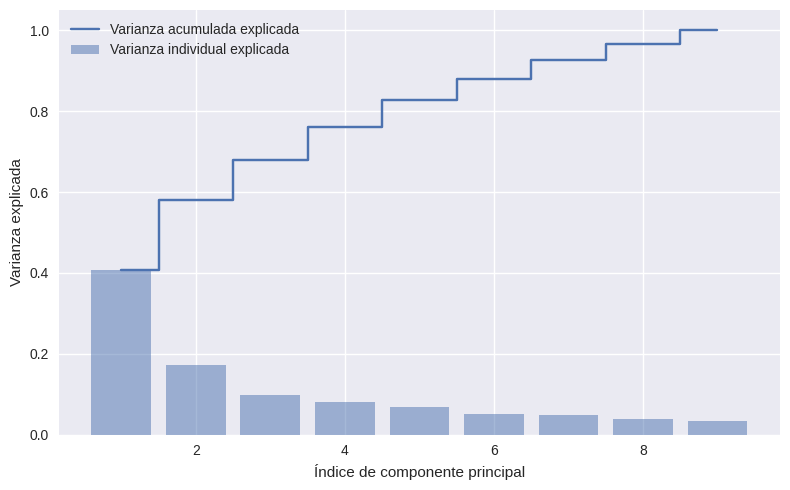

In [161]:
# PCA
pca_full = PCA()
pca_full.fit(df_gad_linea_2_scaled)

# varianza explicada
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Print varianza por componente
print("Varianza explicada por componente:\n", explained_variance_ratio)

# Print varianza acumulada
print("\nVarianza explicada acumulada:\n", cumulative_explained_variance)

# grafica
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Varianza individual explicada')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Varianza acumulada explicada')
plt.ylabel('Varianza explicada')
plt.xlabel('Índice de componente principal')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

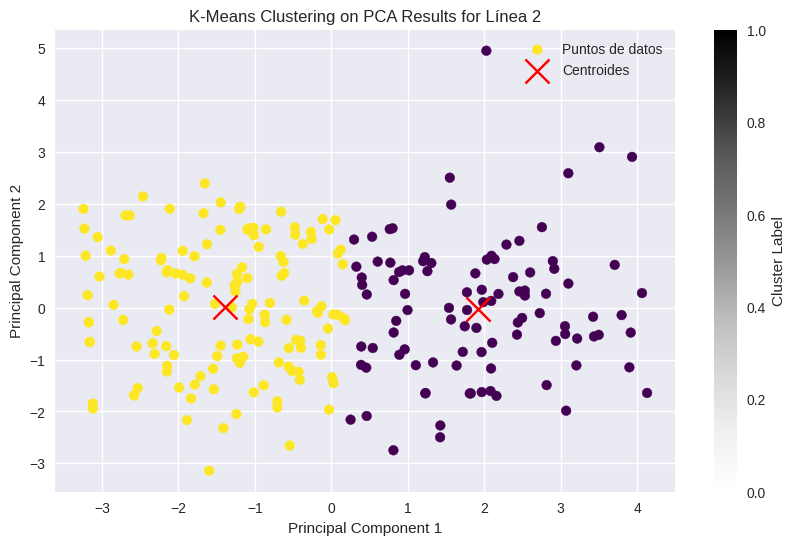

In [162]:
# Aplicar PCA con 5 componentes
pca_gad_linea_2 = PCA(n_components=5)
gad_linea_2_pca = pca_gad_linea_2.fit_transform(df_gad_linea_2_scaled)

# K means con 2 clusters para linea 2
kmeans_gad_linea_2 = KMeans(n_clusters=2, random_state=42)
clusters_gad_linea_2 = kmeans_gad_linea_2.fit_predict(gad_linea_2_pca)

# Grafica PCA Clusters
plt.figure(figsize=(10, 6))
plt.scatter(gad_linea_2_pca[:, 0], gad_linea_2_pca[:, 1], c=clusters_gad_linea_2, cmap='viridis', marker='o', label='Puntos de datos')
plt.scatter(kmeans_gad_linea_2.cluster_centers_[:, 0], kmeans_gad_linea_2.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Centroides')
plt.title('K-Means Clustering on PCA Results for Línea 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()

### Diagrama Silhouette

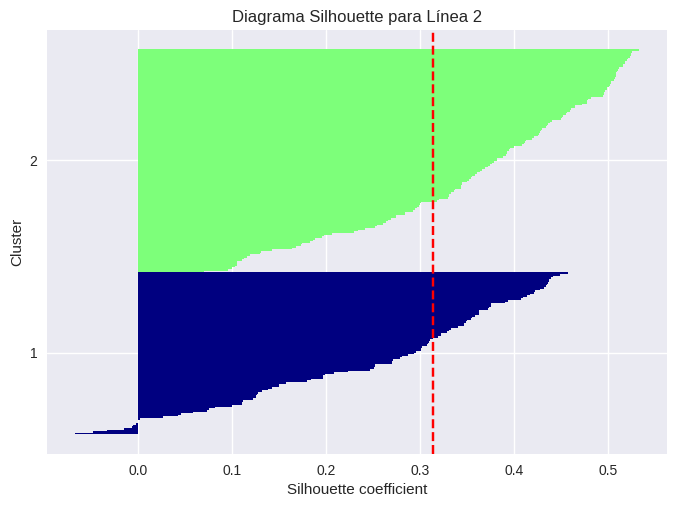

In [163]:
cluster_labels = np.unique(clusters_gad_linea_2)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(gad_linea_2_pca, clusters_gad_linea_2, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[clusters_gad_linea_2 == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.title('Diagrama Silhouette para Línea 2')
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.show()

### Análisis de Clusters GAD-7

Asignamos Clusters al dataframe original GAD-7

In [164]:
# Linea 1, incluyendo GAD-7 total
gad_lin1_full = df_gad[df_gad['Línea'] == 1][['Edad', 'Año', 'Línea', 'NP', 'P', 'PD', 'DR', 'I', 'IR', 'MT', 'TOTAL GAD-7']]

# Linea 2, incluyendo BECK total
gad_lin2_full = df_gad[df_gad['Línea'] == 2][['Edad', 'Año', 'Línea', 'NP', 'P', 'PD', 'DR', 'I', 'IR', 'MT', 'TOTAL GAD-7']]

# Asignar clusters
gad_lin1_full['Cluster'] = clusters_gad_linea_1
gad_lin2_full['Cluster'] = clusters_gad_linea_2

**Comparamos la distribución de puntaje total GAD-7 para cada cluster**

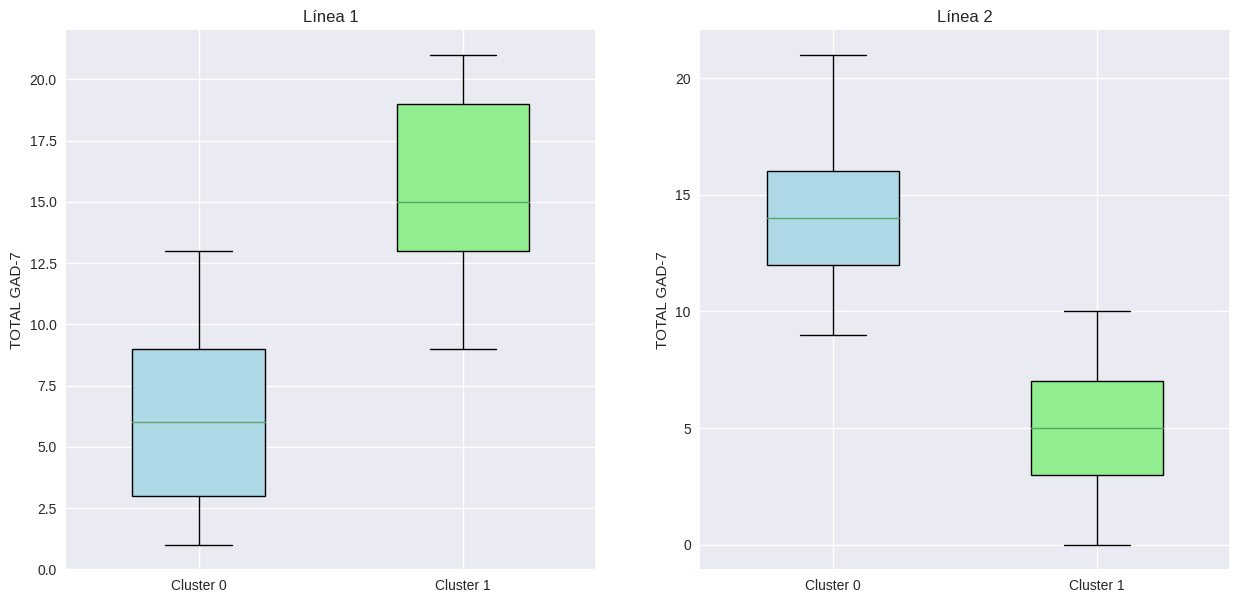

In [165]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.boxplot([gad_lin1_full[gad_lin1_full['Cluster'] == 0]['TOTAL GAD-7']], positions=[0], widths=0.5,
            patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.boxplot([gad_lin1_full[gad_lin1_full['Cluster'] == 1]['TOTAL GAD-7']], positions=[1], widths=0.5,
            patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Línea 1')
plt.ylabel('TOTAL GAD-7')
plt.xticks([0, 1], ['Cluster 0', 'Cluster 1'])

plt.subplot(1, 2, 2)
plt.boxplot([gad_lin2_full[gad_lin2_full['Cluster'] == 0]['TOTAL GAD-7']], positions=[0], widths=0.5,
            patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.boxplot([gad_lin2_full[gad_lin2_full['Cluster'] == 1]['TOTAL GAD-7']], positions=[1], widths=0.5,
            patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Línea 2')
plt.ylabel('TOTAL GAD-7')
plt.xticks([0, 1], ['Cluster 0', 'Cluster 1'])

plt.show()

**Observamos el puntaje promedio para cada pregunta del cuestionario GAD-7**

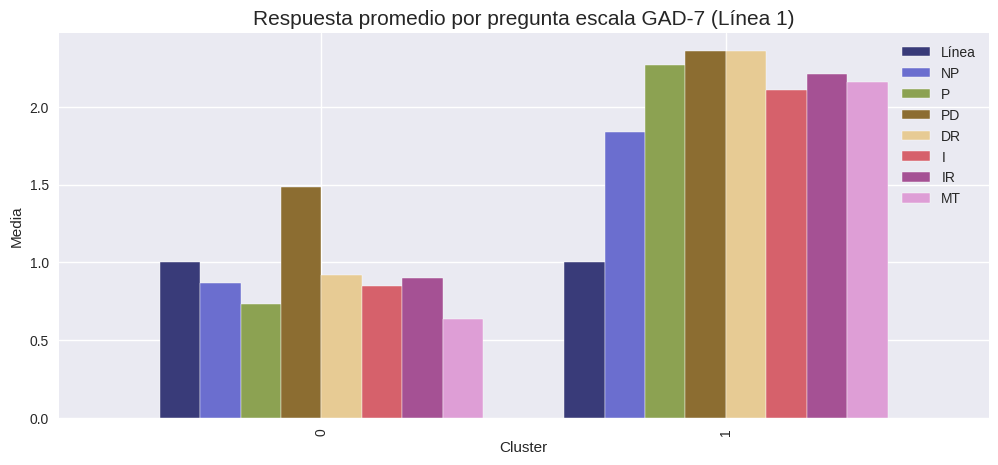

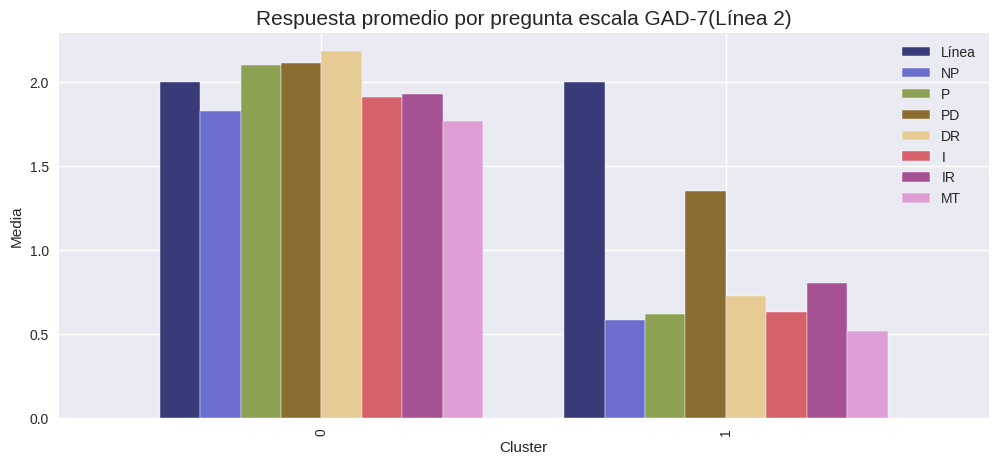

In [166]:
(gad_lin1_full
 .drop(columns=['Edad', 'Año', 'TOTAL GAD-7'])
 .groupby('Cluster')
 .mean()
 .plot(kind='bar', figsize=(12, 5), width=0.8, colormap='tab20b', edgecolor='white')
)
plt.title('Respuesta promedio por pregunta escala GAD-7 (Línea 1)', fontsize=15)
plt.ylabel('Media')

(gad_lin2_full
 .drop(columns=['Edad', 'Año', 'TOTAL GAD-7'])
 .groupby('Cluster')
 .mean()
 .plot(kind='bar', figsize=(12, 5), width=0.8, colormap='tab20b', edgecolor='white')
)
plt.title('Respuesta promedio por pregunta escala GAD-7(Línea 2)', fontsize=15)
plt.ylabel('Media')

plt.show()

### Observaciones escala GAD-7

En la escala de Ansiedad Generalizada GAD-7, observamos un ligero traslape en la separación de los clusters con respecto al puntaje total, el cual es mas notorio en el grupo de estudiantes con preparatoria en línea (Línea 1).

Este solapamiento sugiere una mayor variabilidad en los niveles de ansiedad dentro de este grupo específico, lo cual podría ser objeto de un examen más detenido para comprender mejor los factores subyacentes.

## **K-means Escala BECK**

In [167]:
# Segmentación de la escala BECK
df_beck= df[['Edad', 'Año', 'Línea', 'TPE', 'ACO', 'TBP', 'IDR', 'TMR', 'MR', 'CFA','INT', 'ATZ', 'NRV', 'BLQ', 'TBM',
             'IEI', 'MPC', 'AHG', 'TMM', 'MDO', 'DIG', 'DVS', 'RBF', 'TOTAL BECK']]

# Segmentación de clases
# Linea = 1
beck_linea_1 = df_beck[df_beck['Línea'] == 1][['Edad', 'Año', 'TPE', 'ACO', 'TBP', 'IDR', 'TMR', 'MR', 'CFA','INT', 'ATZ', 'NRV', 'BLQ', 'TBM',
             'IEI', 'MPC', 'AHG', 'TMM', 'MDO', 'DIG', 'DVS', 'RBF']]
# Linea = 2
beck_linea_2 = df_beck[df_beck['Línea'] == 2][['Edad', 'Año', 'TPE', 'ACO', 'TBP', 'IDR', 'TMR', 'MR', 'CFA','INT', 'ATZ', 'NRV', 'BLQ', 'TBM',
             'IEI', 'MPC', 'AHG', 'TMM', 'MDO', 'DIG', 'DVS', 'RBF']]

In [168]:
# Estandarización de datos
scaler = StandardScaler()

beck_linea_1_scaled = scaler.fit_transform(beck_linea_1)
df_beck_linea_1_scaled = pd.DataFrame(beck_linea_1_scaled, columns=beck_linea_1.columns)

beck_linea_2_scaled = scaler.fit_transform(beck_linea_2)
df_beck_linea_2_scaled = pd.DataFrame(beck_linea_2_scaled, columns=beck_linea_2.columns)

### Linea 1 (preparatoria online)

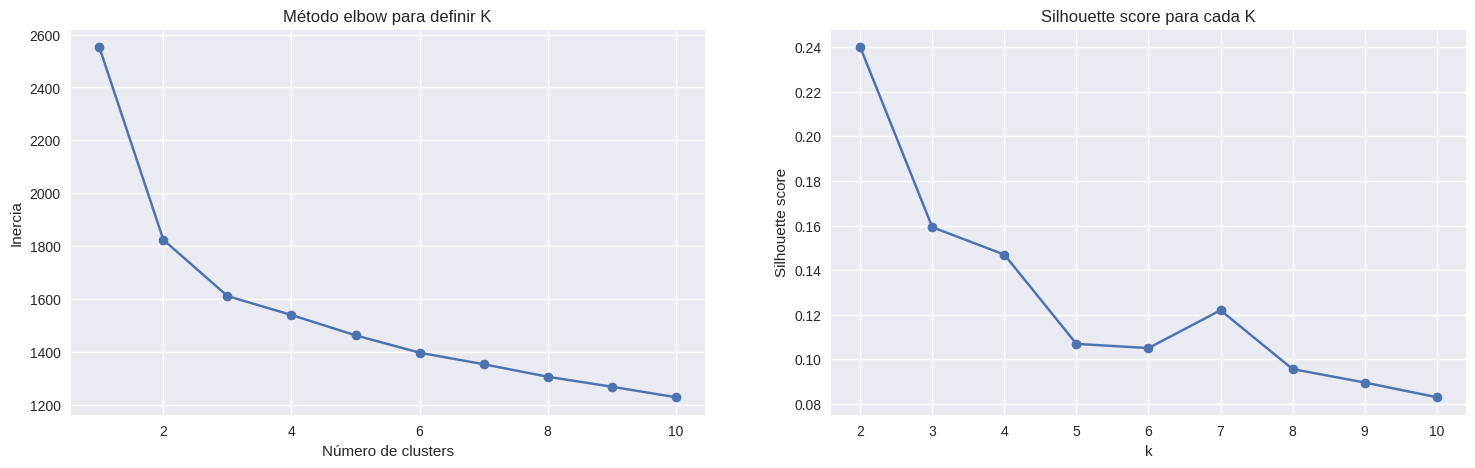

In [169]:
# Inercia y Silhouette score
inertias_beck = []
silhouette_scores = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_beck_linea_1_scaled)
    inertias_beck.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(df_beck_linea_1_scaled, kmeans.labels_))

# Graficas Elbow y Silhouette score
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), inertias_beck, marker='o')
plt.title('Método elbow para definir K')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette score para cada K')
plt.xlabel('k')
plt.ylabel('Silhouette score')

plt.show()

### PCA

Varianza explicada por componente:
 [0.411819   0.07945925 0.05913653 0.0497742  0.04497874 0.03842716
 0.03666045 0.03551491 0.02969588 0.02796366 0.02531016 0.02347449
 0.02140013 0.01967275 0.01615535 0.0155019  0.01336905 0.01271383
 0.01128941 0.01012159 0.00914772 0.00841383]

Varianza explicada acumulada:
 [0.411819   0.49127825 0.55041478 0.60018898 0.64516773 0.68359489
 0.72025534 0.75577025 0.78546613 0.81342979 0.83873995 0.86221444
 0.88361456 0.90328731 0.91944267 0.93494457 0.94831361 0.96102744
 0.97231686 0.98243845 0.99158617 1.        ]


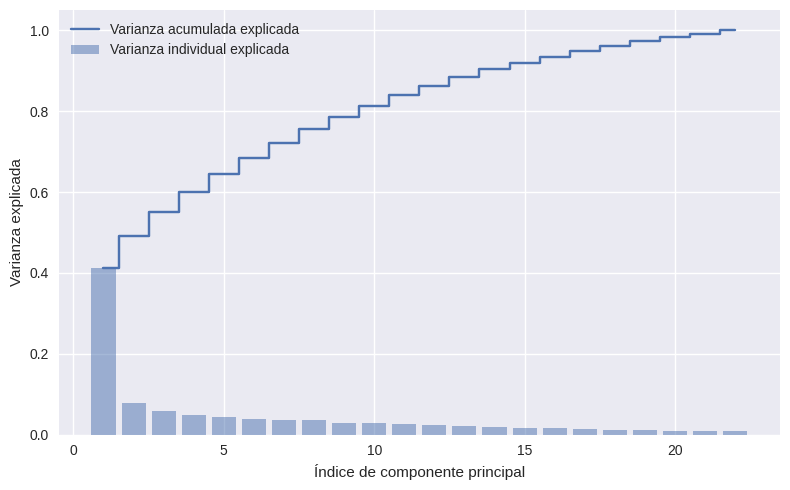

In [170]:
# PCA
pca_full = PCA()
pca_full.fit(df_beck_linea_1_scaled)

# varianza explicada
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Print varianza por componente
print("Varianza explicada por componente:\n", explained_variance_ratio)

# Print varianza acumulada
print("\nVarianza explicada acumulada:\n", cumulative_explained_variance)

# grafica
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Varianza individual explicada')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Varianza acumulada explicada')
plt.ylabel('Varianza explicada')
plt.xlabel('Índice de componente principal')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

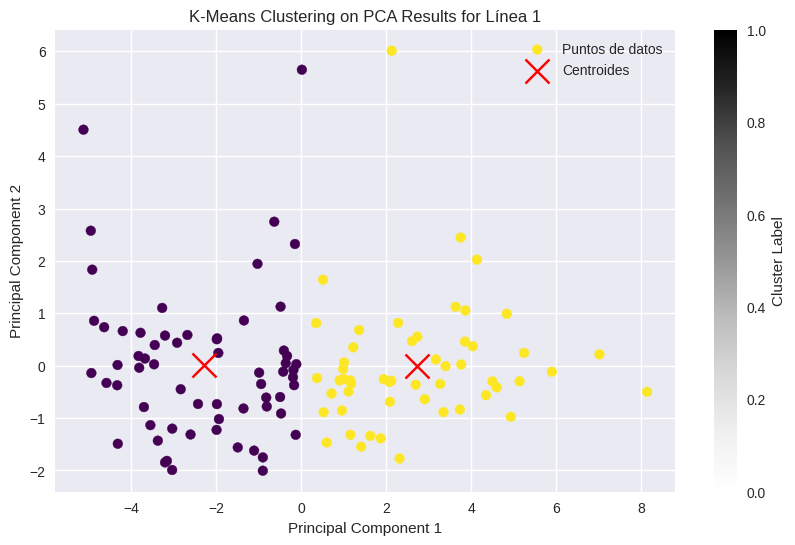

In [171]:
# Aplicar PCA con 10 componentes
pca_beck_linea_1 = PCA(n_components=10)
beck_linea_1_pca = pca_beck_linea_1.fit_transform(df_beck_linea_1_scaled)

# K means con 2 clusters para linea 1
kmeans_beck_linea_1 = KMeans(n_clusters=2, random_state=42)
clusters_beck_linea_1 = kmeans_beck_linea_1.fit_predict(beck_linea_1_pca)

# Grafica PCA Clusters
plt.figure(figsize=(10, 6))
plt.scatter(beck_linea_1_pca[:, 0], beck_linea_1_pca[:, 1], c=clusters_beck_linea_1, cmap='viridis', marker='o', label='Puntos de datos')
plt.scatter(kmeans_beck_linea_1.cluster_centers_[:, 0], kmeans_beck_linea_1.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Centroides')
plt.title('K-Means Clustering on PCA Results for Línea 1')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()

### Diagrama Silhouette

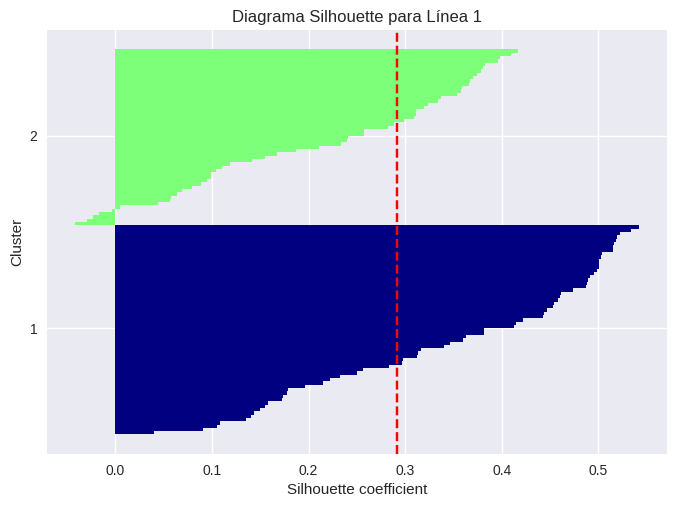

In [172]:
cluster_labels = np.unique(clusters_beck_linea_1)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(beck_linea_1_pca, clusters_beck_linea_1, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[clusters_beck_linea_1 == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.title('Diagrama Silhouette para Línea 1')
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.show()

### Linea 2 (preparatoria presencial)

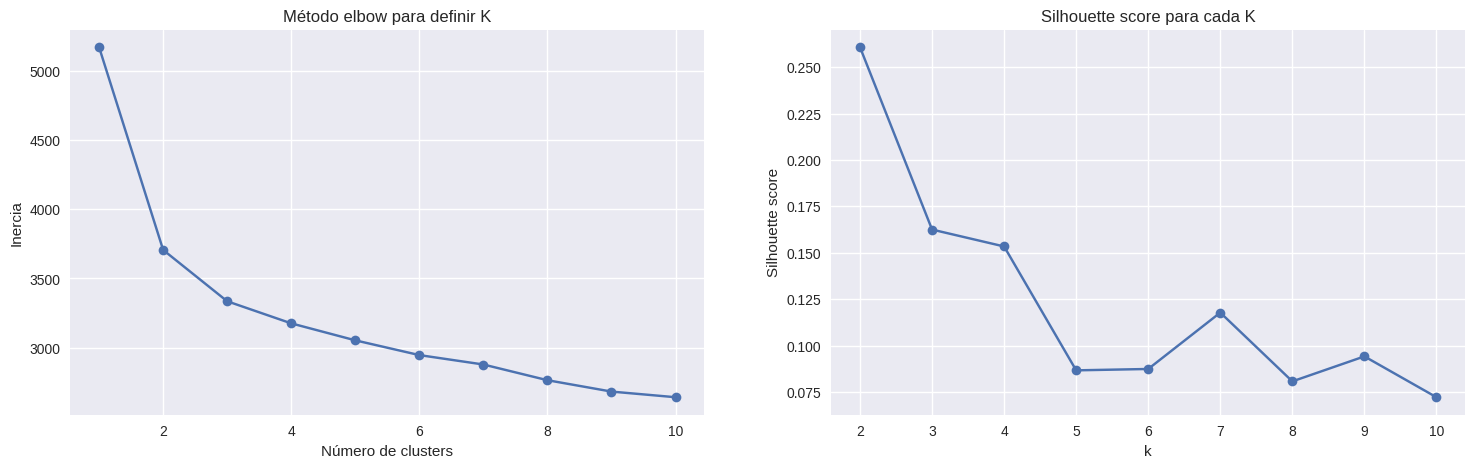

In [173]:
# Inercia y Silhouette score
inertias_beck = []
silhouette_scores = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_beck_linea_2_scaled)
    inertias_beck.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(df_beck_linea_2_scaled, kmeans.labels_))

# Graficas Elbow y Silhouette score
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), inertias_beck, marker='o')
plt.title('Método elbow para definir K')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette score para cada K')
plt.xlabel('k')
plt.ylabel('Silhouette score')

plt.show()

### PCA

Varianza explicada por componente:
 [0.39350209 0.07551702 0.06217662 0.05043611 0.047626   0.04320467
 0.03496149 0.03123282 0.02893762 0.02854672 0.02653698 0.02390082
 0.02199535 0.02006623 0.01858183 0.01699944 0.01623785 0.01487598
 0.01385578 0.01100633 0.01067792 0.00912433]

Varianza explicada acumulada:
 [0.39350209 0.46901911 0.53119573 0.58163184 0.62925784 0.67246251
 0.707424   0.73865682 0.76759444 0.79614115 0.82267813 0.84657895
 0.8685743  0.88864053 0.90722236 0.92422181 0.94045965 0.95533563
 0.96919142 0.98019775 0.99087567 1.        ]


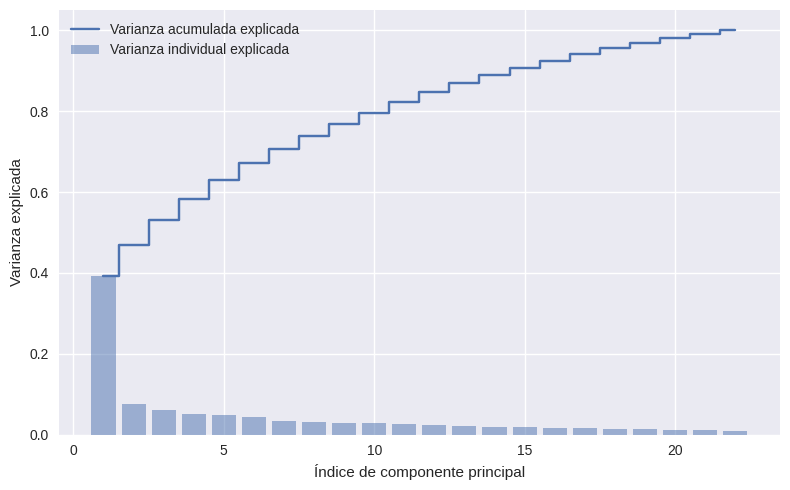

In [174]:
# PCA
pca_full = PCA()
pca_full.fit(df_beck_linea_2_scaled)

# varianza explicada
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Print varianza por componente
print("Varianza explicada por componente:\n", explained_variance_ratio)

# Print varianza acumulada
print("\nVarianza explicada acumulada:\n", cumulative_explained_variance)

# grafica
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Varianza individual explicada')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Varianza acumulada explicada')
plt.ylabel('Varianza explicada')
plt.xlabel('Índice de componente principal')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

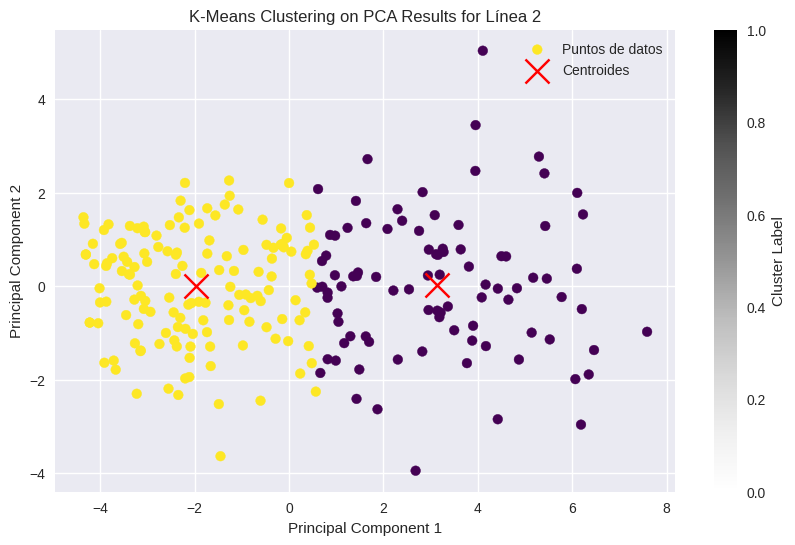

In [175]:
# Aplicar PCA con 11 componentes
pca_beck_linea_2 = PCA(n_components=11)
beck_linea_2_pca = pca_beck_linea_2.fit_transform(df_beck_linea_2_scaled)

# K means con 2 clusters para linea 2
kmeans_beck_linea_2 = KMeans(n_clusters=2, random_state=42)
clusters_beck_linea_2 = kmeans_beck_linea_2.fit_predict(beck_linea_2_pca)

# Grafica PCA Clusters
plt.figure(figsize=(10, 6))
plt.scatter(beck_linea_2_pca[:, 0], beck_linea_2_pca[:, 1], c=clusters_beck_linea_2, cmap='viridis', marker='o', label='Puntos de datos')
plt.scatter(kmeans_beck_linea_2.cluster_centers_[:, 0], kmeans_beck_linea_2.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Centroides')
plt.title('K-Means Clustering on PCA Results for Línea 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()

### Diagrama Silhouette

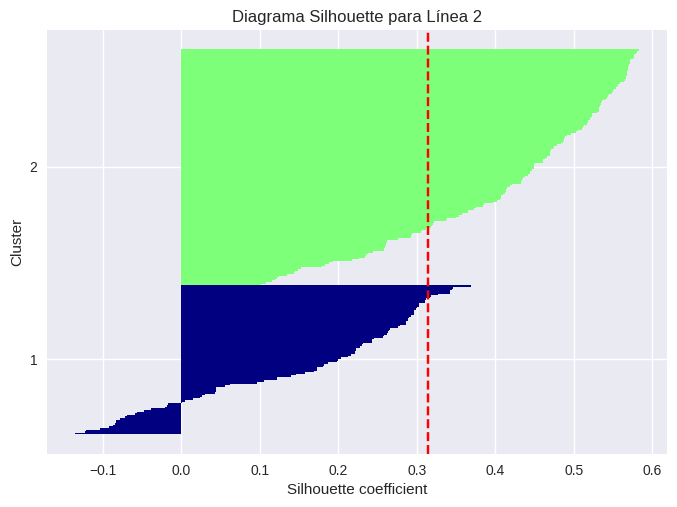

In [176]:
cluster_labels = np.unique(clusters_beck_linea_2)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(beck_linea_2_pca, clusters_beck_linea_2, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[clusters_beck_linea_2 == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.title('Diagrama Silhouette para Línea 2')
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.show()

### Análisis de Clusters BECK

Asignamos Clusters al dataframe original BECK

In [177]:
# Linea 1, incluyendo BECK total
beck_lin1_full = df_beck[df_beck['Línea'] == 1][['Edad', 'Año', 'TPE', 'ACO', 'TBP', 'IDR', 'TMR', 'MR', 'CFA','INT', 'ATZ', 'NRV', 'BLQ', 'TBM',
             'IEI', 'MPC', 'AHG', 'TMM', 'MDO', 'DIG', 'DVS', 'RBF', 'TOTAL BECK']]

# Linea 2, incluyendo BECK total
beck_lin2_full = df_beck[df_beck['Línea'] == 2][['Edad', 'Año', 'TPE', 'ACO', 'TBP', 'IDR', 'TMR', 'MR', 'CFA','INT', 'ATZ', 'NRV', 'BLQ', 'TBM',
             'IEI', 'MPC', 'AHG', 'TMM', 'MDO', 'DIG', 'DVS', 'RBF', 'TOTAL BECK']]

# Asignar clusters
beck_lin1_full['Cluster'] = clusters_beck_linea_1
beck_lin2_full['Cluster'] = clusters_beck_linea_2

**Comparamos la distribución de puntaje total BECK para cada cluster**

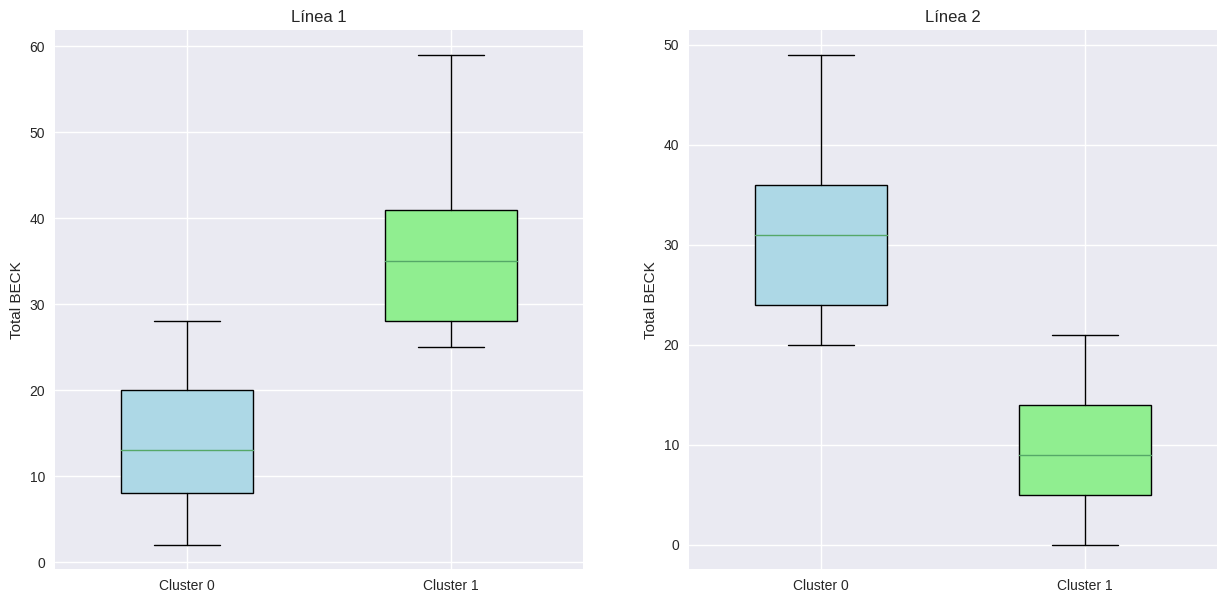

In [178]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.boxplot([beck_lin1_full[beck_lin1_full['Cluster'] == 0]['TOTAL BECK']], positions=[0], widths=0.5,
            patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.boxplot([beck_lin1_full[beck_lin1_full['Cluster'] == 1]['TOTAL BECK']], positions=[1], widths=0.5,
            patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Línea 1')
plt.ylabel('Total BECK')
plt.xticks([0, 1], ['Cluster 0', 'Cluster 1'])

plt.subplot(1, 2, 2)
plt.boxplot([beck_lin2_full[beck_lin2_full['Cluster'] == 0]['TOTAL BECK']], positions=[0], widths=0.5,
            patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.boxplot([beck_lin2_full[beck_lin2_full['Cluster'] == 1]['TOTAL BECK']], positions=[1], widths=0.5,
            patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Línea 2')
plt.ylabel('Total BECK')
plt.xticks([0, 1], ['Cluster 0', 'Cluster 1'])

plt.show()

**Observamos el puntaje promedio para cada pregunta del cuestionario BECK**

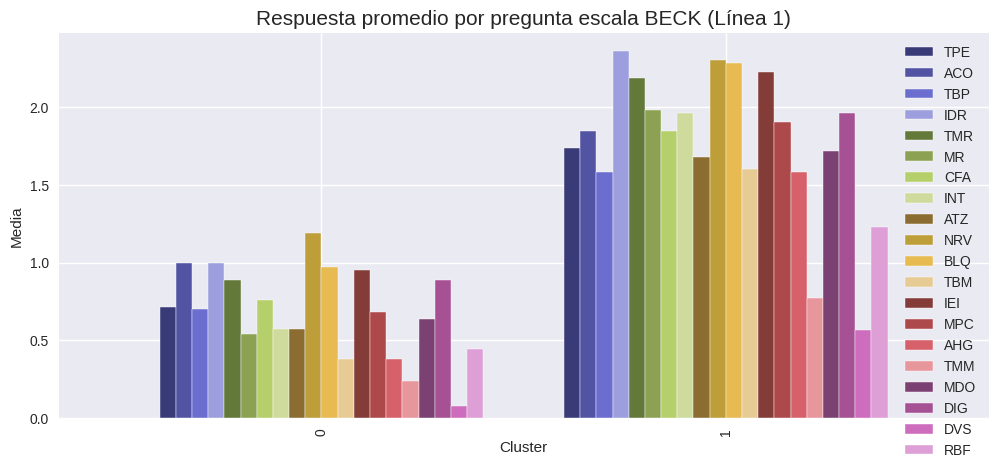

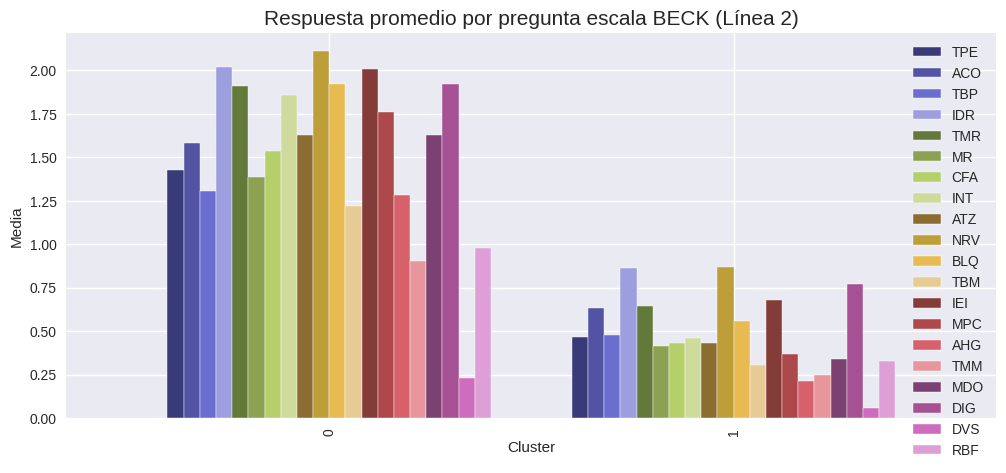

In [179]:
(beck_lin1_full
 .drop(columns=['Edad', 'Año', 'TOTAL BECK'])
 .groupby('Cluster')
 .mean()
 .plot(kind='bar', figsize=(12, 5), width=0.8, colormap='tab20b', edgecolor='white')
)
plt.title('Respuesta promedio por pregunta escala BECK (Línea 1)', fontsize=15)
plt.ylabel('Media')

(beck_lin2_full
 .drop(columns=['Edad', 'Año', 'TOTAL BECK'])
 .groupby('Cluster')
 .mean()
 .plot(kind='bar', figsize=(12, 5), width=0.8, colormap='tab20b', edgecolor='white')
)
plt.title('Respuesta promedio por pregunta escala BECK (Línea 2)', fontsize=15)
plt.ylabel('Media')

plt.show()

### Observaciones escala BECK

Se puede observar que, especialmente para el grupo "Línea 2", los clusters generados mediante K-Means no alcanzan la optimización deseada. Esta apreciación se confirma visualmente al examinar el diagrama de Silhouette. Incluso al experimentar con K=3, se obtienen resultados similares. Es importante señalar que una limitación evidente de K-Means se presenta cuando los clusters exhiben tamaños y densidades distintos, lo cual parece ser el caso en nuestra situación.

Como paso siguiente, exploraremos el uso de otros algoritmos de clusterización para abordar las limitaciones identificadas con K-Means.


# **Analisis General**

Se eliminan las escalas totales que contienen los acumulados de las variables individuales y se elimina la variable en “Línea” del dataframe, para ser utilizada como variable de referencia o comparación.

##Analisis de SPIN

### Preparacion de datos

In [180]:
# Segmentación de la escala SPIN
df_spin = df[['Edad', 'Año', 'Línea', 'MA', 'SON', 'ES', 'PD', 'CRI', 'VR', 'TR', 'EF',
              'ECA', 'HD', 'HP', 'EC', 'PC', 'GM', 'MM', 'PA', 'TS', 'TOTAL SPIN','Fobia_Social','Ansiedad_Generalizada', 'Ansiedad_Beck']]

df_spin_2 = df[['Edad', 'Año', 'Línea', 'MA', 'SON', 'ES', 'PD', 'CRI', 'VR', 'TR', 'EF',
              'ECA', 'HD', 'HP', 'EC', 'PC', 'GM', 'MM', 'PA', 'TS', 'TOTAL SPIN']]

In [181]:
#Preparación del dataset
spin_new = df_spin.drop(columns = ["Línea","TOTAL SPIN","Fobia_Social","Ansiedad_Generalizada","Ansiedad_Beck"])

scaler = StandardScaler()

spin_new_scaled = pd.DataFrame(scaler.fit_transform(spin_new), columns = spin_new.columns)

In [182]:
spin_new_scaled.columns

Index(['Edad', 'Año', 'MA', 'SON', 'ES', 'PD', 'CRI', 'VR', 'TR', 'EF', 'ECA',
       'HD', 'HP', 'EC', 'PC', 'GM', 'MM', 'PA', 'TS'],
      dtype='object')

In [183]:
# Estandarización de datos
scaler = StandardScaler()

df_spin_scaled = scaler.fit_transform(df_spin_2)

spin_original_scaled = spin_new_scaled
# pd.DataFrame(df_spin_scaled, columns=df_spin_2.columns)

### Diagrama Silhouette

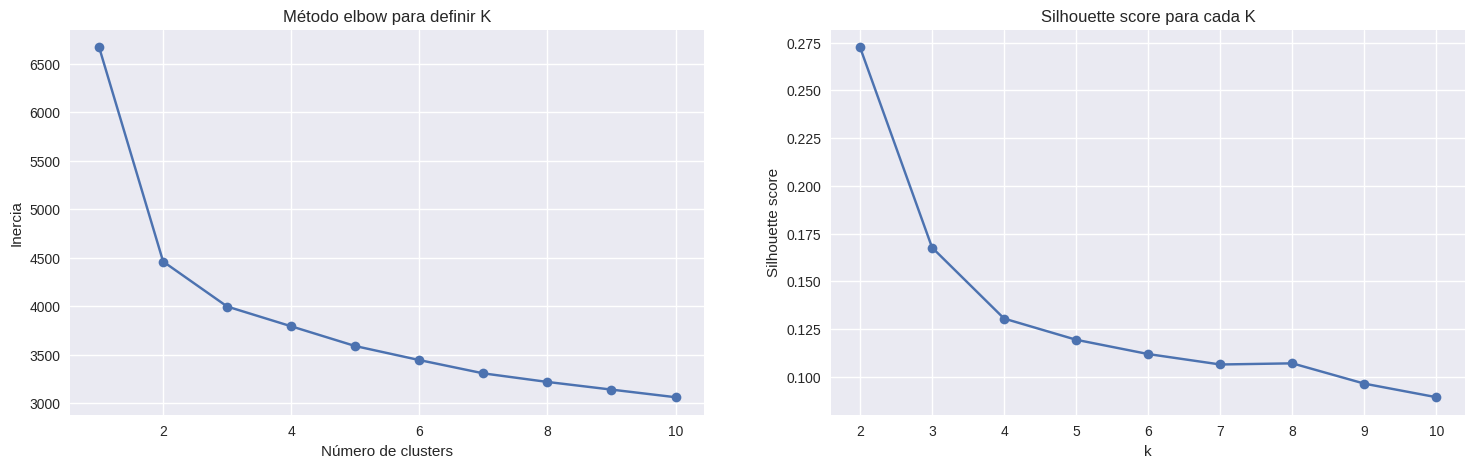

In [184]:
# Inercia y Silhouette score
inertias_spin = []
silhouette_scores = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(spin_original_scaled)
    inertias_spin.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(spin_original_scaled, kmeans.labels_))

# Graficas Elbow y Silhouette score
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), inertias_spin, marker='o')
plt.title('Método elbow para definir K')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette score para cada K')
plt.xlabel('k')
plt.ylabel('Silhouette score')

plt.show()

### PCA

Varianza explicada por componente:
 [0.46447744 0.09411652 0.06957121 0.04669762 0.04304503 0.03768039
 0.03586309 0.03324542 0.02640109 0.02407255 0.02013699 0.01859633
 0.01513364 0.01433835 0.01370311 0.01129122 0.01109755 0.01088273
 0.00964974]

Varianza explicada acumulada:
 [0.46447744 0.55859395 0.62816516 0.67486278 0.71790781 0.7555882
 0.79145129 0.82469671 0.8510978  0.87517035 0.89530734 0.91390367
 0.9290373  0.94337565 0.95707877 0.96836999 0.97946753 0.99035026
 1.        ]


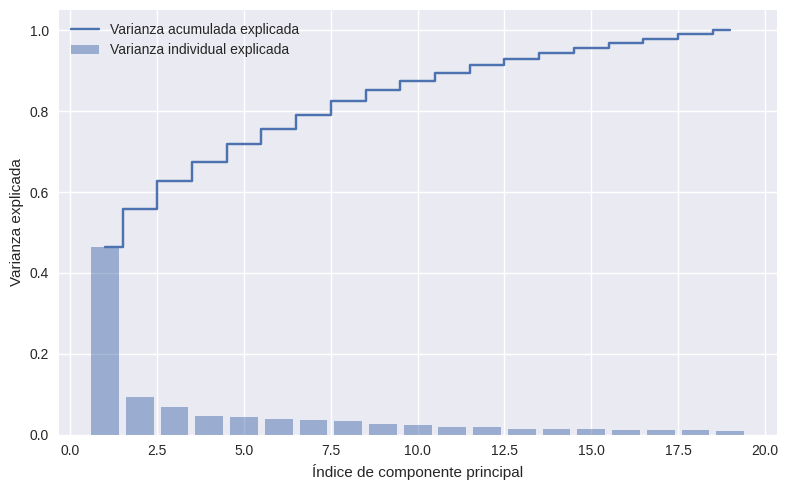

In [185]:
# PCA
pca_full = PCA()
pca_full.fit(spin_original_scaled)

# varianza explicada
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Print varianza por componente
print("Varianza explicada por componente:\n", explained_variance_ratio)

# Print varianza acumulada
print("\nVarianza explicada acumulada:\n", cumulative_explained_variance)

# grafica
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Varianza individual explicada')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Varianza acumulada explicada')
plt.ylabel('Varianza explicada')
plt.xlabel('Índice de componente principal')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

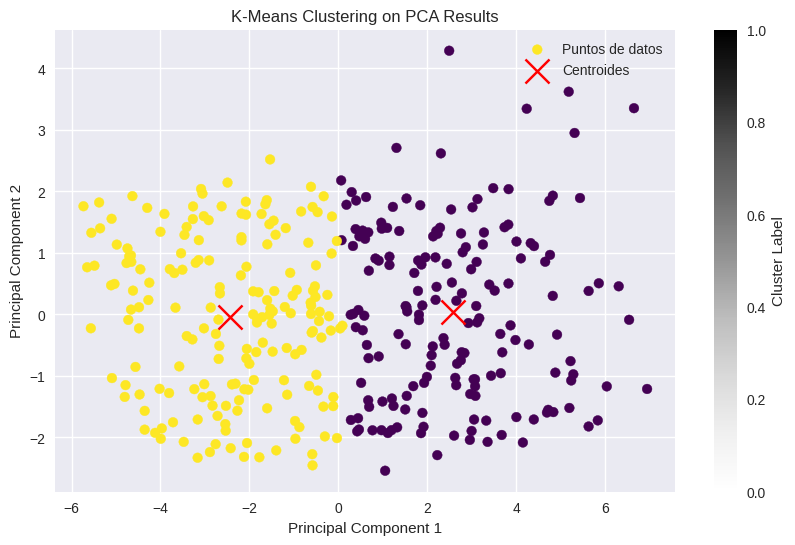

In [186]:
# Aplicar PCA con 8 componentes
pca_spin_linea_1 = PCA(n_components=8)
spin_linea_1_pca = pca_spin_linea_1.fit_transform(spin_original_scaled)

# K means con 2 clusters para linea 1
kmeans_spin_linea_1 = KMeans(n_clusters=2, random_state=42)
clusters_spin_linea_1 = kmeans_spin_linea_1.fit_predict(spin_linea_1_pca)

# Grafica PCA Clusters
plt.figure(figsize=(10, 6))
plt.scatter(spin_linea_1_pca[:, 0], spin_linea_1_pca[:, 1], c=clusters_spin_linea_1, cmap='viridis', marker='o', label='Puntos de datos')
plt.scatter(kmeans_spin_linea_1.cluster_centers_[:, 0], kmeans_spin_linea_1.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Centroides')
plt.title('K-Means Clustering on PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()

###Analisis de Componentes

In [187]:
# Obtener los nombres de las columnas originales
columnas_originales = spin_original_scaled.columns

# Crear un DataFrame con los componentes principales y los nombres de las columnas originales
componentes_principales_df = pd.DataFrame(pca_spin_linea_1.components_, columns=columnas_originales)

# Visualizar los componentes principales y las variables que los componen
print("Componentes Principales:")
print(componentes_principales_df)


Componentes Principales:
       Edad       Año        MA       SON        ES        PD       CRI  \
0 -0.055673 -0.060104  0.195871  0.194667  0.248646  0.231756  0.255934   
1  0.689050  0.684250  0.077032 -0.034806  0.007477  0.044147  0.031743   
2  0.004069 -0.011801 -0.227446 -0.153220  0.346966  0.360479 -0.245142   
3 -0.084392 -0.095014  0.427113 -0.560863  0.111798 -0.111839  0.016156   
4 -0.028792 -0.080897  0.464014  0.264986 -0.196307  0.118912 -0.292284   
5 -0.022089  0.053218  0.263003  0.028518  0.319012 -0.295683 -0.042850   
6 -0.014771  0.019670  0.305290 -0.301210 -0.131201  0.362976  0.184258   
7 -0.059892 -0.029808  0.222729  0.436752  0.232708  0.191146  0.274587   

         VR        TR        EF       ECA        HD        HP        EC  \
0  0.264442  0.190594  0.217504  0.246180  0.261708  0.256907  0.231833   
1 -0.042574 -0.040346  0.033824  0.015133  0.080399  0.069751  0.051334   
2 -0.005492 -0.053699  0.448166  0.269006  0.221502  0.065512 -0.344497   

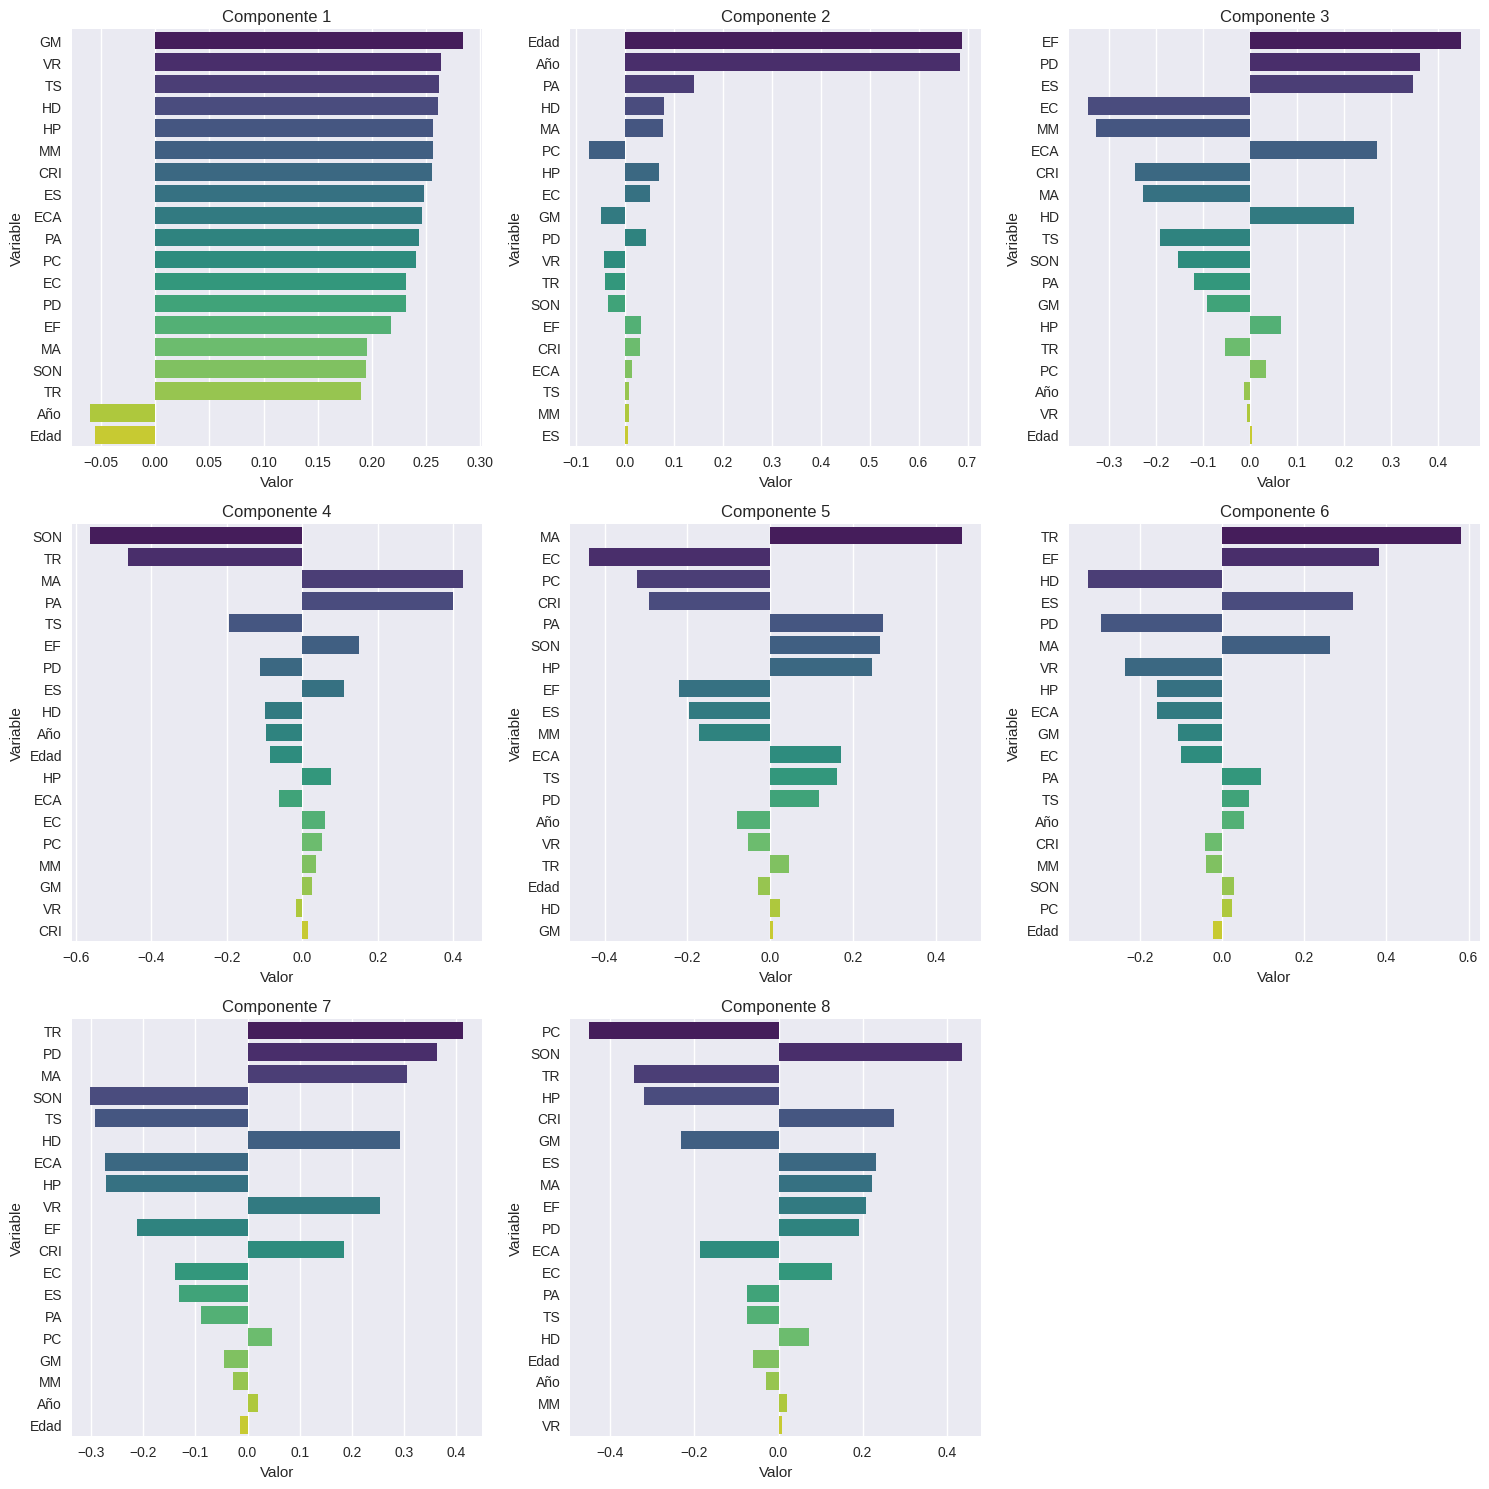

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener los nombres de las columnas originales
columnas_originales = spin_original_scaled.columns

# Crear un DataFrame con los componentes principales y los nombres de las columnas originales
componentes_principales_df = pd.DataFrame(pca_spin_linea_1.components_, columns=columnas_originales)

# Configurar el tamaño del gráfico
num_componentes = len(componentes_principales_df)
num_filas = (num_componentes - 1) // 3 + 1
plt.figure(figsize=(15, num_filas * 5))

# Iterar sobre cada componente principal y crear un gráfico de barras
for i, componente in enumerate(componentes_principales_df.iterrows(), start=1):
    nombre_componente = f"Componente {i}"

    # Obtener las variables y sus valores
    variables_y_valores = componente[1].items()

    # Crear un DataFrame auxiliar para el gráfico de barras
    df_aux = pd.DataFrame(variables_y_valores, columns=["Variable", "Valor"])

    # Ordenar el DataFrame por los valores absolutos en orden descendente
    df_aux["Valor_abs"] = df_aux["Valor"].abs()
    df_aux = df_aux.sort_values(by="Valor_abs", ascending=False).drop("Valor_abs", axis=1)

    # Crear el gráfico de barras
    plt.subplot(num_filas, 3, i)
    sns.barplot(data=df_aux, x="Valor", y="Variable", palette="viridis")
    plt.title(nombre_componente)

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()


### Analisis de Clúster

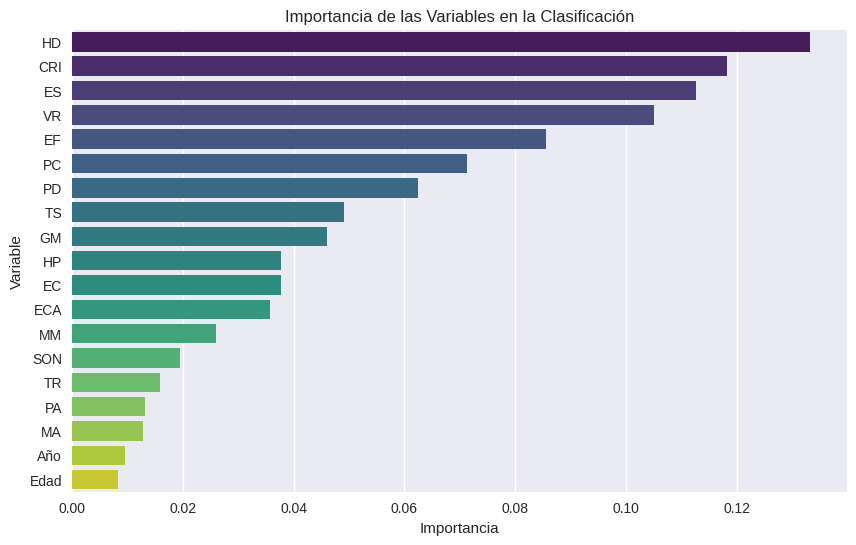

In [191]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


# Definir las variables independientes (X) y la variable dependiente (y)
X = spin_lin1_full.drop(['Cluster','TOTAL SPIN'], axis=1)
y = spin_lin1_full['Cluster']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Obtener la importancia de las variables
feature_importance = rf_model.feature_importances_

# Crear un DataFrame con la importancia de las variables
feature_importance_df = pd.DataFrame({'Variable': X.columns, 'Importancia': feature_importance})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)

# Visualizar la importancia de las variables
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Variable', data=feature_importance_df, palette='viridis')
plt.title('Importancia de las Variables en la Clasificación')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()

In [192]:
# Linea 1, incluyendo SPIN total
spin_lin1_full = df_spin[['Edad', 'Año','Línea', 'MA', 'SON', 'ES', 'PD', 'CRI', 'VR', 'TR', 'EF',
                                                 'ECA', 'HD', 'HP', 'EC', 'PC', 'GM', 'MM', 'PA', 'TS', 'TOTAL SPIN','Fobia_Social','Ansiedad_Generalizada', 'Ansiedad_Beck']]
# Asignar clusters
spin_lin1_full['Cluster'] = clusters_spin_linea_1

spin_lin1_full.head()

,Edad,Año,Línea,MA,SON,ES,PD,CRI,VR,TR,...,PC,GM,MM,PA,TS,TOTAL SPIN,Fobia_Social,Ansiedad_Generalizada,Ansiedad_Beck,Cluster
0,21,5,2,1,0,0,0,1,1,1,...,0,0,1,0,2,7,0,0,0,1
1,25,5,2,0,0,1,1,2,2,0,...,0,1,2,0,1,14,0,0,0,1
2,19,1,1,3,4,4,4,4,4,4,...,4,4,4,2,4,65,1,1,1,0
3,18,1,1,2,2,2,2,1,3,4,...,0,2,2,1,1,31,0,0,0,0
4,19,2,1,1,0,2,2,1,2,3,...,3,2,2,0,2,28,0,0,1,1


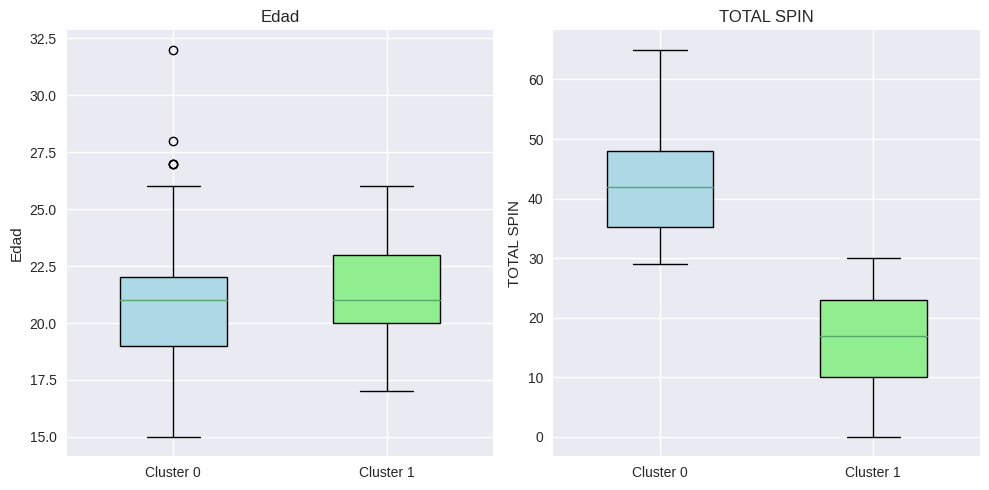

In [193]:
plt.figure(figsize=(10, 5))

columns_to_plot = ['Edad', 'TOTAL SPIN']  # columnas para los boxplot

for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(1, 2, i)  # Ajuste de columnas
    # Boxplot Cluster 0
    plt.boxplot([spin_lin1_full[spin_lin1_full['Cluster'] == 0][column]], positions=[0], widths=0.5,
                patch_artist=True, boxprops=dict(facecolor='lightblue'))
    # Boxplot Cluster 1
    plt.boxplot([spin_lin1_full[spin_lin1_full['Cluster'] == 1][column]], positions=[1], widths=0.5,
                patch_artist=True, boxprops=dict(facecolor='lightgreen'))

    #plt.boxplot([spin_lin1_full[spin_lin1_full['Cluster'] == 2][column]], positions=[2], widths=0.5,
                #patch_artist=True, boxprops=dict(facecolor='lightpink'))


    plt.title(column)
    plt.ylabel(column)
    plt.xticks([0, 1], ['Cluster 0', 'Cluster 1'])  #agregar más clusters si es necesario

plt.tight_layout()
plt.show()

###Promedio de las respuestas

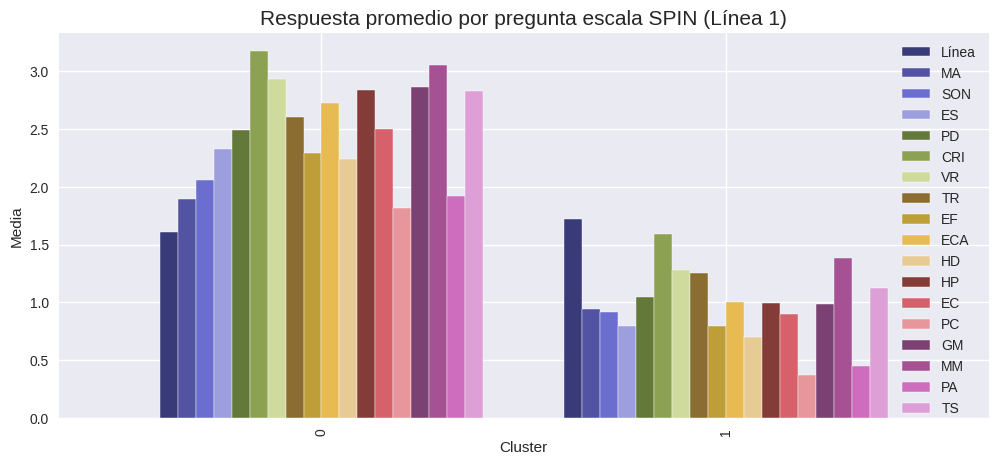

In [194]:
(spin_lin1_full
 .drop(columns=['Edad', 'Año', 'TOTAL SPIN','Fobia_Social','Ansiedad_Generalizada', 'Ansiedad_Beck'])
 .groupby('Cluster')
 .mean()
 .plot(kind='bar', figsize=(12, 5), width=0.8, colormap='tab20b', edgecolor='white')
)
plt.title('Respuesta promedio por pregunta escala SPIN (Línea 1)', fontsize=15)
plt.ylabel('Media')


plt.show()

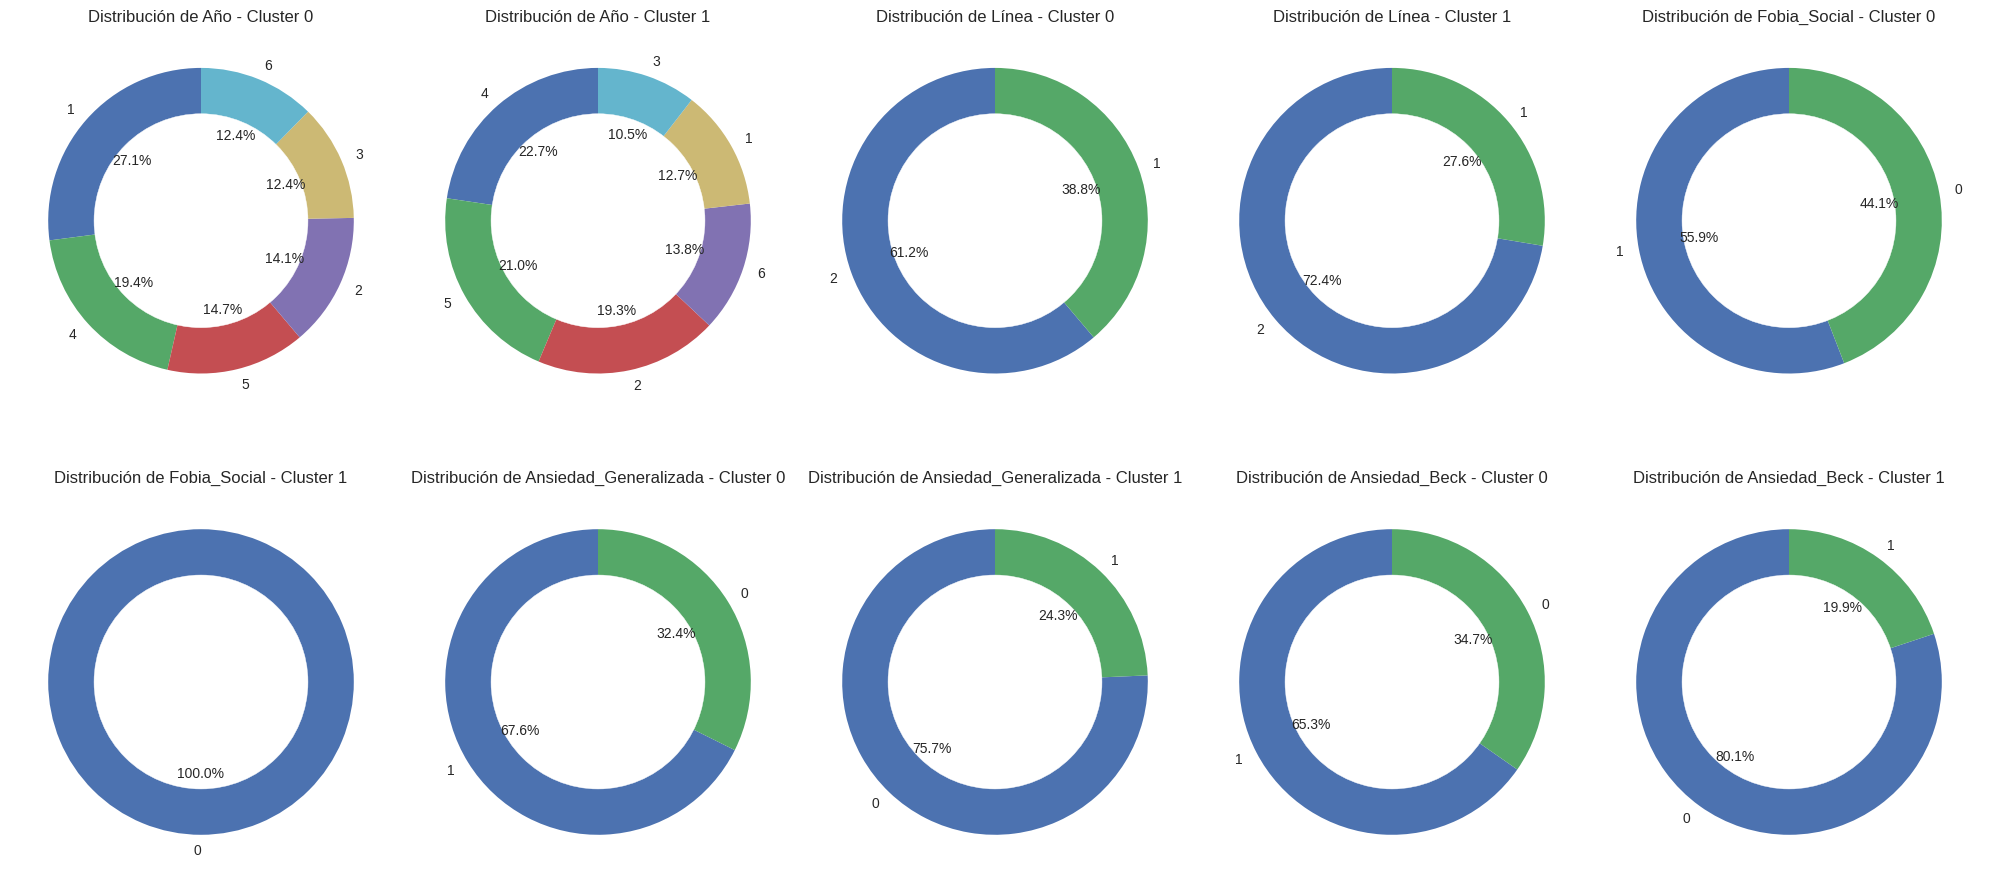

In [195]:
# colores para las categorías de las donas
colors = [
    'lightblue', 'lightgreen', 'lightcoral', 'lightskyblue',
    'lightgrey', 'lightpink', 'lightseagreen', 'lightyellow', 'lightsteelblue'
]

fig, axs = plt.subplots(2, 5, figsize=(20, 10))  # cajones para ajustar si hay más gráficas
axs = axs.flatten()

# categoricas para las donas
columns_to_plot = ['Año', 'Línea','Fobia_Social','Ansiedad_Generalizada', 'Ansiedad_Beck']  # mover aca

for i, column in enumerate(columns_to_plot):
    for cluster in range(len(spin_lin1_full['Cluster'].unique())):
        ax = axs[i * len(spin_lin1_full['Cluster'].unique()) + cluster]
        cluster_counts = spin_lin1_full[spin_lin1_full['Cluster'] == cluster][column].value_counts(normalize=True)
        ax.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90)
        ax.add_artist(plt.Circle((0, 0), 0.7, color='white'))
        ax.set_title(f'Distribución de {column} - Cluster {cluster}')

plt.tight_layout()
plt.show()



###Regresiones

In [196]:
#regresion logit para estimar la probabilidad que tienen de afectar los componentes de SPIN a estudiar o no en línea

df['Línea_binary'] = df['Línea'].apply(lambda x: 1 if x == 1 else 0)

# independientes
X = df[['Edad', 'Año', 'MA', 'SON', 'ES', 'PD', 'CRI', 'VR', 'TR', 'EF',
                                                 'ECA', 'HD', 'HP', 'EC', 'PC', 'GM', 'MM', 'PA', 'TS']]  # Continue with all your independent variables
X = sm.add_constant(X)  # constante para la regresion

# variable dependiente binaria para el logit
y = df['Línea_binary']

# Modelo con errores robustos
model = sm.Logit(y, X).fit(cov_type='HC0')

# Resultados de la regresion
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.213670
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           Línea_binary   No. Observations:                  351
Model:                          Logit   Df Residuals:                      331
Method:                           MLE   Df Model:                           19
Date:                Mon, 26 Feb 2024   Pseudo R-squ.:                  0.6633
Time:                        04:01:41   Log-Likelihood:                -74.998
converged:                       True   LL-Null:                       -222.72
Covariance Type:                  HC0   LLR p-value:                 1.721e-51
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.2635      5.171      5.272      0.000      17.128      37.399
Edad          -1.2724      0.

In [197]:
# Regresión OLS con errores robustos y efectos fijos, ahora se usa como dependiente TOTAL SPIN y como independientes las sociodemográficas y la de Línea como efecto fijo

# Dummy para hacer línea una categoríca, efecto fijo
linea_dummies = pd.get_dummies(df['Línea'], drop_first=True, prefix='Línea')

X = df[['Edad', 'Año']]  # Independientes y se agrega abajo la nueva
X = pd.concat([X, linea_dummies], axis=1)

# variable dependiente
y = df['TOTAL SPIN'] # aca se agrega
X = sm.add_constant(X)  # Termino constante para la regresión

# OLS con errores robustos
ols_model = sm.OLS(y, X).fit(cov_type='HC0')

# Resultados del modelo
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:             TOTAL SPIN   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     2.506
Date:                Mon, 26 Feb 2024   Prob (F-statistic):             0.0589
Time:                        04:01:41   Log-Likelihood:                -1453.9
No. Observations:                 351   AIC:                             2916.
Df Residuals:                     347   BIC:                             2931.
Df Model:                           3                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.3894     12.276      3.127      0.0

In [198]:
# GLS con matriz identidad para errores robustos
gls_model = sm.GLS(y, X, sigma=np.eye(len(y))).fit()

# Resultados GLS
print(gls_model.summary())


                            GLS Regression Results                            
Dep. Variable:             TOTAL SPIN   R-squared:                       0.022
Model:                            GLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     2.610
Date:                Mon, 26 Feb 2024   Prob (F-statistic):             0.0514
Time:                        04:01:41   Log-Likelihood:                -1453.9
No. Observations:                 351   AIC:                             2916.
Df Residuals:                     347   BIC:                             2931.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.3894     10.579      3.629      0.0

###Matriz de Confusion

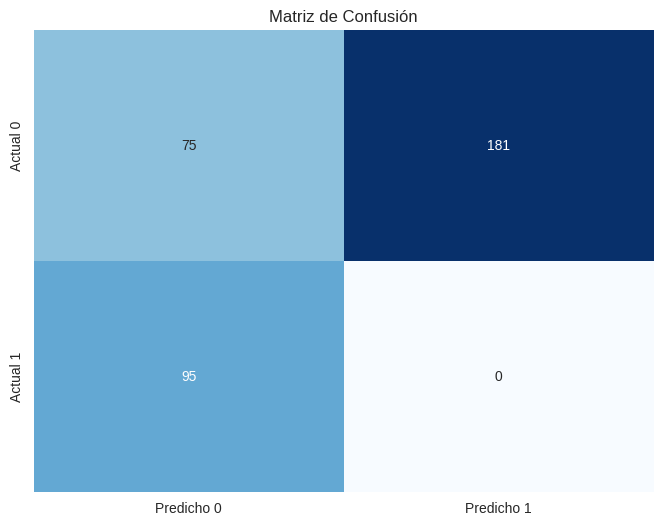

In [199]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Obtener las variables reales y predichas
y_real = spin_lin1_full['Fobia_Social']
y_predicha = spin_lin1_full['Cluster']

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_real, y_predicha)

# Crear un DataFrame para visualizar con seaborn
conf_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicho 0', 'Predicho 1'])

# Visualizar la matriz de confusión con colores
plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, cmap="Blues", fmt='g', cbar=False)
plt.title('Matriz de Confusión')
plt.show()


###Perfiles de Clusters

**Cluster 0:** La respuesta promedio de los estudiantes es de 1.5 a 3 para las preguntas del estudio SPIN por lo que suponemos se trata de estudiantes con nivel mayor de Fobia Social. El grupo esta principalemnte conformado por alumnos de 1, 2 y 3 año de la carrera de medicina. Mientras que el 51% habia cursado la preparatoria de forma presencial y el 55% habian sido clasificados como alumnos con fobia social. El 67% padecia de ansiedad generalizada (GAD-7) y el 65% con sintomas de ansiedad (BECK).

**Cluster 1:** La respuesta promedio de los estudiantes es de 0 a 1.5 para las preguntas del estudio SPIN por lo que suponemos se trata de estudiantes con nivel menor de Fobia Social. El grupo esta principalemnte conformado por alumnos de 2, 4 y 5 año de la carrera de medicina. Mientras que el 72% habia cursado la preparatoria de forma presencial y ningun estudiante habia sido clasificados como alumno con fobia social. Solo el 24% padecia de ansiedad generalizada (GAD-7) y el 19% con sintomas de ansiedad (BECK).

###Observaciones SPIN

Empleamos una matriz de confusion para comparar cuantos de los actuales estudiantes clasificados con fobia social segun la medida de corte del estudio de SPIN habian sido clasificado en el cluster 0 el cual aparentemente agrupa a los estudiantes con mayor nivel de ansiedad y el cluster 1 agrupando a los estudiantes con menos de nivel de ansiedad nos encontraos con un numero significativo de FP y FN.

Al analizar la importancia de las variables nos encontramos con que HD (13%), CRI (11%) , ES (11%) ,VR (11%) y EF (9%) ayudaban a determinar al menos en un 55% a que cluster pertenecia el paciente. Por lo que posiblemente un paciente este condicionado a la fobia social al tener un alto puntaje en dichos indicadores.




##Analisis de GAD-7

### Preparacion de datos

In [229]:
# Segmentación de la escala GAD
df_gad = df[['Edad', 'Año', 'Línea', 'NP', 'P', 'PD', 'DR', 'I', 'IR', 'MT',
               'TOTAL GAD-7','Fobia_Social','Ansiedad_Generalizada', 'Ansiedad_Beck']]

df_gad_2 = df[['Edad', 'Año', 'Línea', 'NP', 'P', 'PD', 'DR', 'I', 'IR', 'MT',
               'TOTAL GAD-7']]

In [203]:
#Preparación del dataset
gad_new = df_gad.drop(columns = ["Línea","TOTAL GAD-7","Fobia_Social","Ansiedad_Generalizada","Ansiedad_Beck"])

scaler = StandardScaler()

gad_new_scaled = pd.DataFrame(scaler.fit_transform(gad_new), columns = gad_new.columns)

In [204]:
# Estandarización de datos
scaler = StandardScaler()

df_gad_scaled = scaler.fit_transform(df_gad_2)

gad_original_scaled = gad_new_scaled
# pd.DataFrame(df_spin_scaled, columns=df_spin_2.columns)

In [205]:
spin_new_scaled.columns

Index(['Edad', 'Año', 'MA', 'SON', 'ES', 'PD', 'CRI', 'VR', 'TR', 'EF', 'ECA',
       'HD', 'HP', 'EC', 'PC', 'GM', 'MM', 'PA', 'TS'],
      dtype='object')

### Diagrama Silhouette

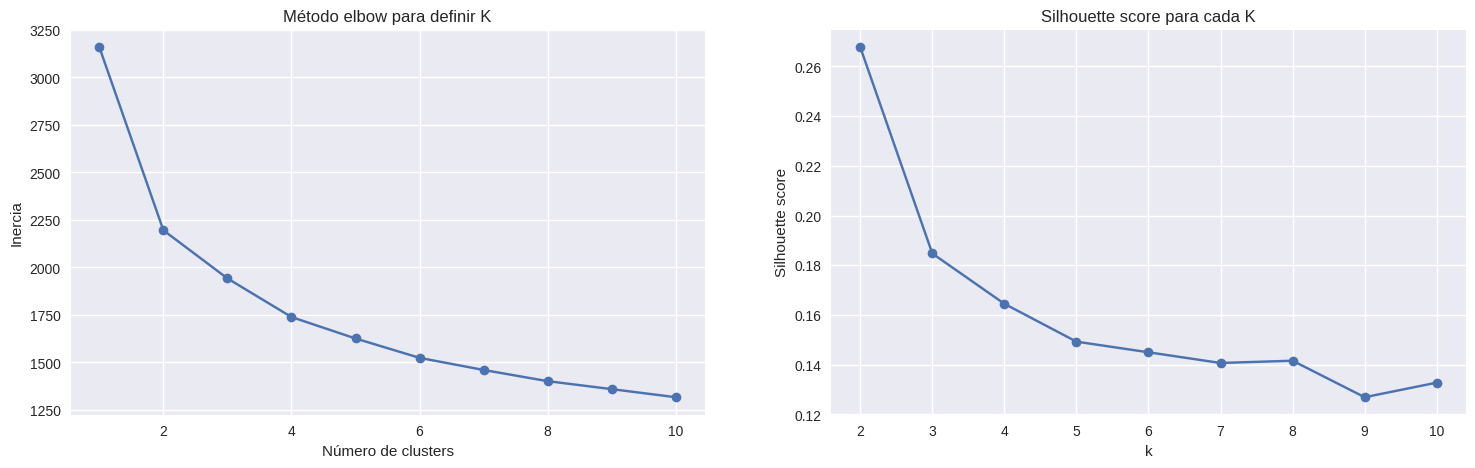

In [206]:
# Inercia y Silhouette score
inertias_gad = []
silhouette_scores = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(gad_original_scaled)
    inertias_gad.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(gad_original_scaled, kmeans.labels_))

# Graficas Elbow y Silhouette score
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), inertias_gad, marker='o')
plt.title('Método elbow para definir K')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette score para cada K')
plt.xlabel('k')
plt.ylabel('Silhouette score')

plt.show()

### PCA

Varianza explicada por componente:
 [0.42140815 0.18979509 0.09854306 0.07142378 0.06802228 0.04923151
 0.04582625 0.03350028 0.02224958]

Varianza explicada acumulada:
 [0.42140815 0.61120324 0.7097463  0.78117009 0.84919237 0.89842388
 0.94425013 0.97775042 1.        ]


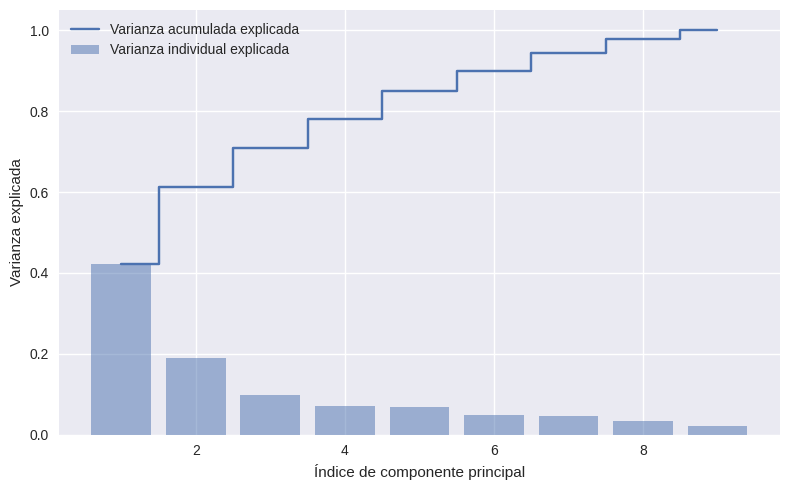

In [207]:
# PCA
pca_full = PCA()
pca_full.fit(gad_original_scaled)

# varianza explicada
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Print varianza por componente
print("Varianza explicada por componente:\n", explained_variance_ratio)

# Print varianza acumulada
print("\nVarianza explicada acumulada:\n", cumulative_explained_variance)

# grafica
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Varianza individual explicada')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Varianza acumulada explicada')
plt.ylabel('Varianza explicada')
plt.xlabel('Índice de componente principal')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

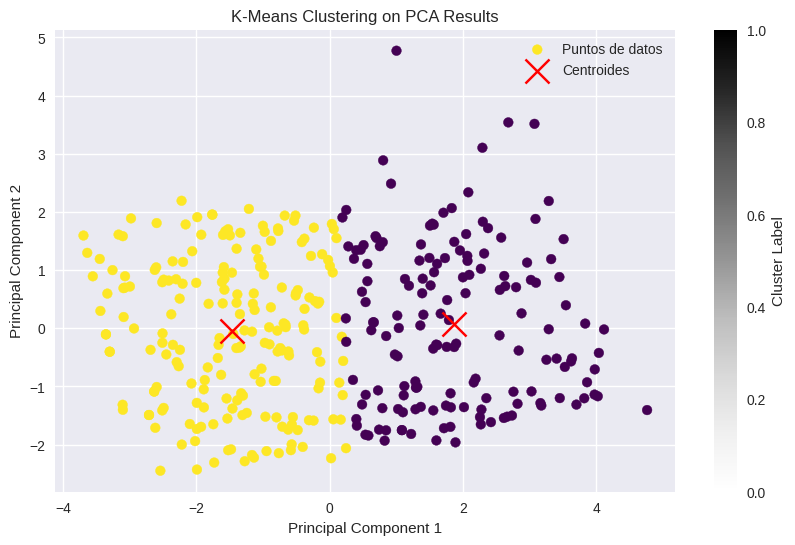

In [211]:
# Aplicar PCA con 4 componentes
pca_gad_linea_1 = PCA(n_components=4)
gad_linea_1_pca = pca_gad_linea_1.fit_transform(gad_original_scaled)

# K means con 2 clusters para linea 1
kmeans_gad_linea_1 = KMeans(n_clusters=2, random_state=42)
clusters_gad_linea_1 = kmeans_gad_linea_1.fit_predict(gad_linea_1_pca)

# Grafica PCA Clusters
plt.figure(figsize=(10, 6))
plt.scatter(gad_linea_1_pca[:, 0], gad_linea_1_pca[:, 1], c=clusters_gad_linea_1, cmap='viridis', marker='o', label='Puntos de datos')
plt.scatter(kmeans_gad_linea_1.cluster_centers_[:, 0], kmeans_gad_linea_1.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Centroides')
plt.title('K-Means Clustering on PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()

###Analisis de Componentes

In [212]:
# Obtener los nombres de las columnas originales
columnas_originales = gad_original_scaled.columns

# Crear un DataFrame con los componentes principales y los nombres de las columnas originales
componentes_principales_df = pd.DataFrame(pca_gad_linea_1.components_, columns=columnas_originales)

# Visualizar los componentes principales y las variables que los componen
print("Componentes Principales:")
print(componentes_principales_df)


Componentes Principales:
       Edad       Año        NP         P        PD        DR         I  \
0 -0.132616 -0.142195  0.389697  0.432257  0.198033  0.413542  0.359720   
1  0.694612  0.686824  0.094157  0.139970  0.000538  0.096315  0.059893   
2 -0.041742 -0.013026  0.083229  0.084625 -0.979112  0.064576  0.105564   
3  0.036276 -0.121897  0.529994  0.218962  0.001378 -0.045032 -0.330040   

         IR        MT  
0  0.361391  0.391468  
1  0.015699  0.064958  
2  0.056928  0.082365  
3 -0.709008  0.203320  


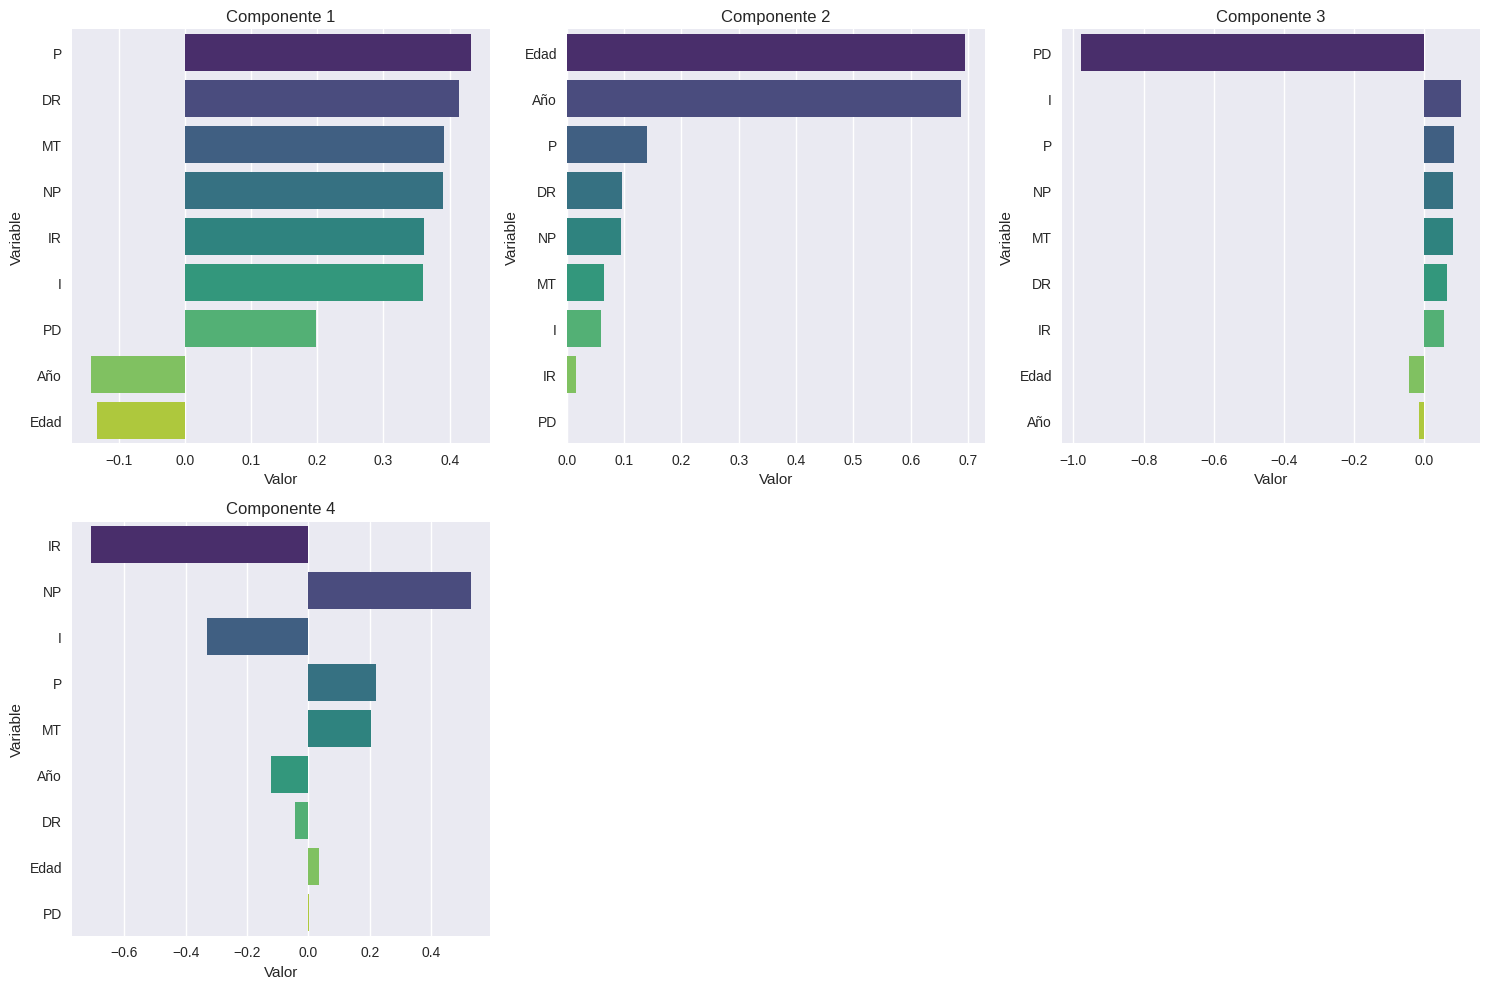

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener los nombres de las columnas originales
columnas_originales = gad_original_scaled.columns

# Crear un DataFrame con los componentes principales y los nombres de las columnas originales
componentes_principales_df = pd.DataFrame(pca_gad_linea_1.components_, columns=columnas_originales)

# Configurar el tamaño del gráfico
num_componentes = len(componentes_principales_df)
num_filas = (num_componentes - 1) // 3 + 1
plt.figure(figsize=(15, num_filas * 5))

# Iterar sobre cada componente principal y crear un gráfico de barras
for i, componente in enumerate(componentes_principales_df.iterrows(), start=1):
    nombre_componente = f"Componente {i}"

    # Obtener las variables y sus valores
    variables_y_valores = componente[1].items()

    # Crear un DataFrame auxiliar para el gráfico de barras
    df_aux = pd.DataFrame(variables_y_valores, columns=["Variable", "Valor"])

    # Ordenar el DataFrame por los valores absolutos en orden descendente
    df_aux["Valor_abs"] = df_aux["Valor"].abs()
    df_aux = df_aux.sort_values(by="Valor_abs", ascending=False).drop("Valor_abs", axis=1)

    # Crear el gráfico de barras
    plt.subplot(num_filas, 3, i)
    sns.barplot(data=df_aux, x="Valor", y="Variable", palette="viridis")
    plt.title(nombre_componente)

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

### Analisis de Clúster

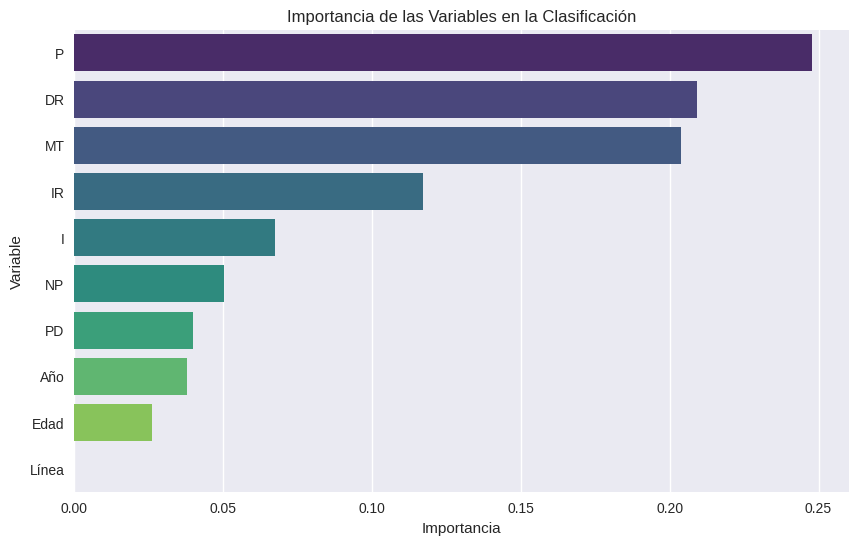

In [214]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


# Definir las variables independientes (X) y la variable dependiente (y)
X = gad_lin1_full.drop(['Cluster','TOTAL GAD-7'], axis=1)
y = gad_lin1_full['Cluster']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Obtener la importancia de las variables
feature_importance = rf_model.feature_importances_

# Crear un DataFrame con la importancia de las variables
feature_importance_df = pd.DataFrame({'Variable': X.columns, 'Importancia': feature_importance})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)

# Visualizar la importancia de las variables
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Variable', data=feature_importance_df, palette='viridis')
plt.title('Importancia de las Variables en la Clasificación')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()

In [215]:
#incluyendo GAD total
gad_lin1_full = df_gad[['Edad', 'Año', 'Línea', 'NP', 'P', 'PD', 'DR', 'I', 'IR', 'MT',
               'TOTAL GAD-7','Fobia_Social','Ansiedad_Generalizada', 'Ansiedad_Beck']]
# Asignar clusters
gad_lin1_full['Cluster'] = clusters_gad_linea_1

gad_lin1_full.head()

,Edad,Año,Línea,NP,P,PD,DR,I,IR,MT,TOTAL GAD-7,Fobia_Social,Ansiedad_Generalizada,Ansiedad_Beck,Cluster
0,21,5,2,0,1,0,1,2,1,1,7,0,0,0,1
1,25,5,2,1,1,1,1,1,1,2,8,0,0,0,1
2,19,1,1,2,3,4,3,3,2,3,19,1,1,1,0
3,18,1,1,1,1,2,1,0,0,1,5,0,0,0,1
4,19,2,1,0,0,2,0,1,1,0,3,0,0,1,1


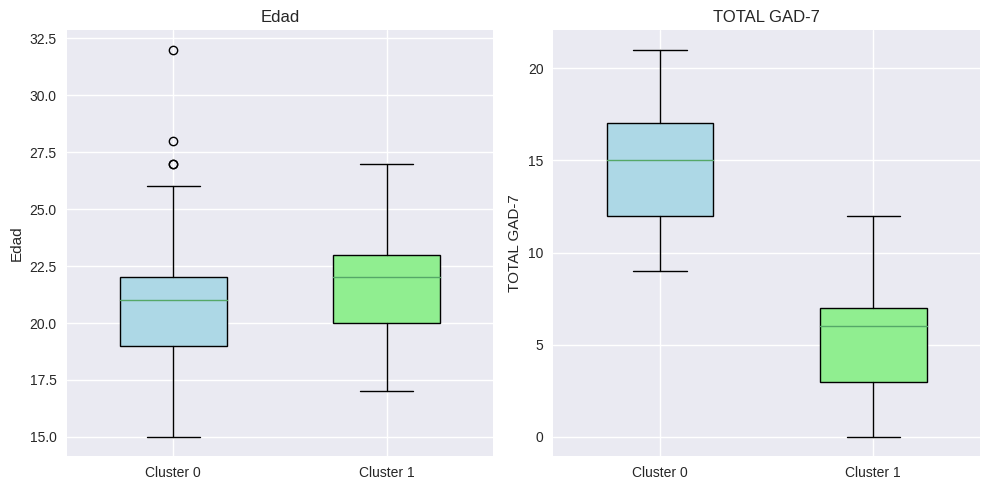

In [217]:
plt.figure(figsize=(10, 5))

columns_to_plot = ['Edad', 'TOTAL GAD-7']  # columnas para los boxplot

for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(1, 2, i)  # Ajuste de columnas
    # Boxplot Cluster 0
    plt.boxplot([gad_lin1_full[gad_lin1_full['Cluster'] == 0][column]], positions=[0], widths=0.5,
                patch_artist=True, boxprops=dict(facecolor='lightblue'))
    # Boxplot Cluster 1
    plt.boxplot([gad_lin1_full[gad_lin1_full['Cluster'] == 1][column]], positions=[1], widths=0.5,
                patch_artist=True, boxprops=dict(facecolor='lightgreen'))

    #plt.boxplot([spin_lin1_full[spin_lin1_full['Cluster'] == 2][column]], positions=[2], widths=0.5,
                #patch_artist=True, boxprops=dict(facecolor='lightpink'))


    plt.title(column)
    plt.ylabel(column)
    plt.xticks([0, 1], ['Cluster 0', 'Cluster 1'])  #agregar más clusters si es necesario

plt.tight_layout()
plt.show()

###Promedio de las respuestas

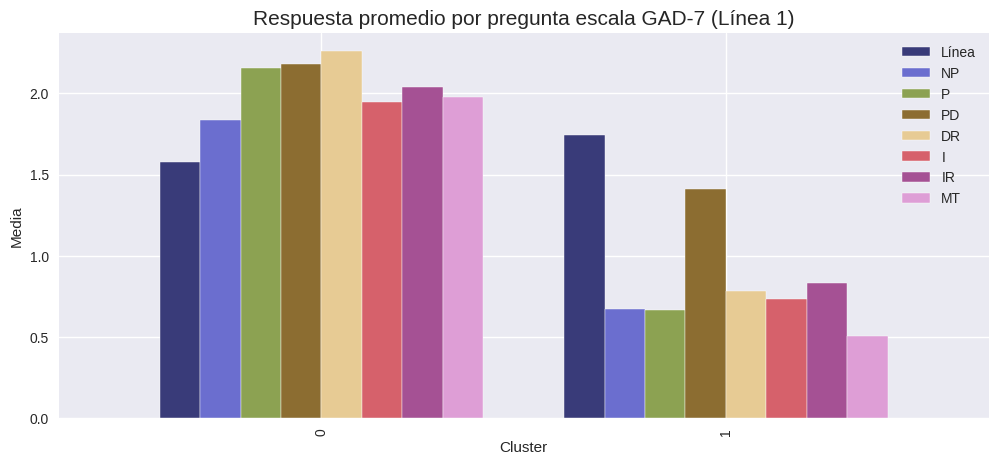

In [218]:
(gad_lin1_full
 .drop(columns=['Edad', 'Año', 'TOTAL GAD-7','Fobia_Social','Ansiedad_Generalizada', 'Ansiedad_Beck'])
 .groupby('Cluster')
 .mean()
 .plot(kind='bar', figsize=(12, 5), width=0.8, colormap='tab20b', edgecolor='white')
)
plt.title('Respuesta promedio por pregunta escala GAD-7 (Línea 1)', fontsize=15)
plt.ylabel('Media')


plt.show()

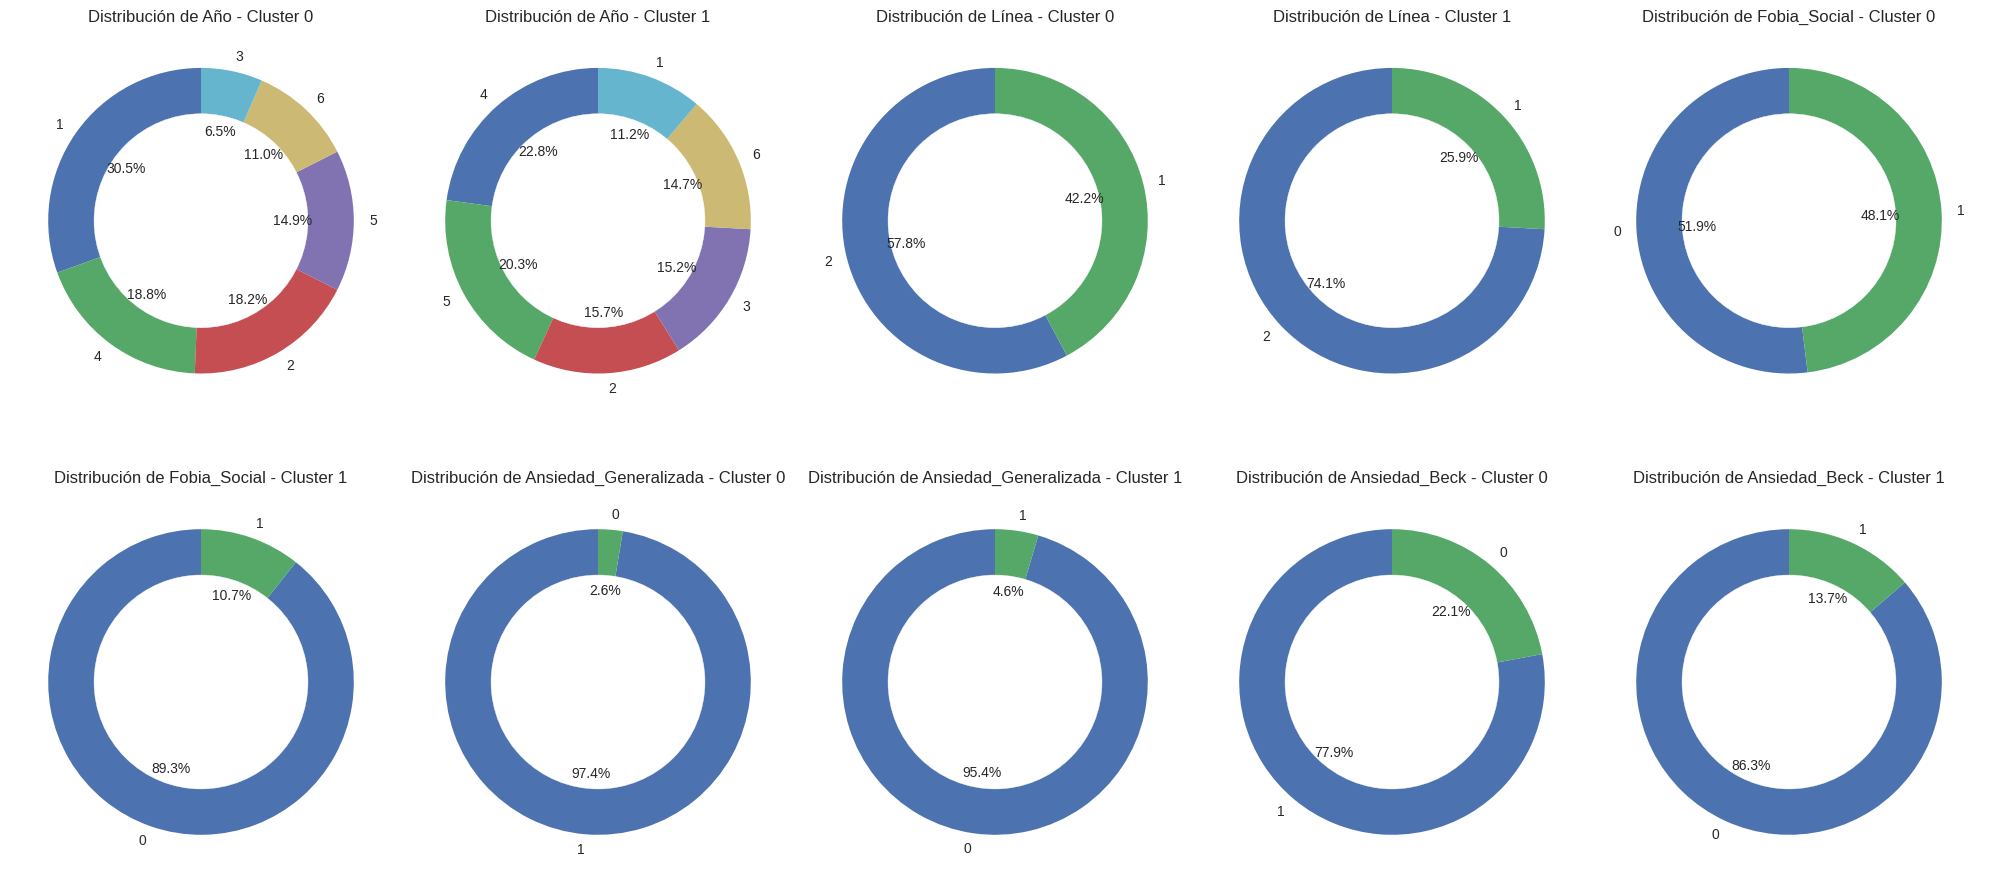

In [252]:
# colores para las categorías de las donas
colors = [
    'lightblue', 'lightgreen', 'lightcoral', 'lightskyblue',
    'lightgrey', 'lightpink', 'lightseagreen', 'lightyellow', 'lightsteelblue'
]

fig, axs = plt.subplots(2, 5, figsize=(20, 10))  # cajones para ajustar si hay más gráficas
axs = axs.flatten()

# categoricas para las donas
columns_to_plot = ['Año', 'Línea','Fobia_Social','Ansiedad_Generalizada', 'Ansiedad_Beck']  # mover aca

for i, column in enumerate(columns_to_plot):
    for cluster in range(len(gad_lin1_full['Cluster'].unique())):
        ax = axs[i * len(gad_lin1_full['Cluster'].unique()) + cluster]
        cluster_counts = gad_lin1_full[gad_lin1_full['Cluster'] == cluster][column].value_counts(normalize=True)
        ax.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90)
        ax.add_artist(plt.Circle((0, 0), 0.7, color='white'))
        ax.set_title(f'Distribución de {column} - Cluster {cluster}')

plt.tight_layout()
plt.show()


###Regresiones

In [222]:
#regresion logit para estimar la probabilidad que tienen de afectar los componentes de GAD a estudiar o no en línea

df['Línea_binary'] = df['Línea'].apply(lambda x: 1 if x == 1 else 0)

# independientes
X = df[['Edad', 'Año','NP', 'P', 'PD', 'DR', 'I', 'IR', 'MT']]  # Continue with all your independent variables
X = sm.add_constant(X)  # constante para la regresion

# variable dependiente binaria para el logit
y = df['Línea_binary']

# Modelo con errores robustos
model = sm.Logit(y, X).fit(cov_type='HC0')

# Resultados de la regresion
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.224473
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           Línea_binary   No. Observations:                  351
Model:                          Logit   Df Residuals:                      341
Method:                           MLE   Df Model:                            9
Date:                Mon, 26 Feb 2024   Pseudo R-squ.:                  0.6462
Time:                        04:50:18   Log-Likelihood:                -78.790
converged:                       True   LL-Null:                       -222.72
Covariance Type:                  HC0   LLR p-value:                 9.812e-57
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.2742      5.755      4.566      0.000      14.995      37.554
Edad          -1.2276      0.

In [224]:
# Regresión OLS con errores robustos y efectos fijos, ahora se usa como dependiente TOTAL GAD y como independientes las sociodemográficas y la de Línea como efecto fijo

# Dummy para hacer línea una categoríca, efecto fijo
linea_dummies = pd.get_dummies(df['Línea'], drop_first=True, prefix='Línea')

X = df[['Edad', 'Año']]  # Independientes y se agrega abajo la nueva
X = pd.concat([X, linea_dummies], axis=1)

# variable dependiente
y = df['TOTAL GAD-7'] # aca se agrega
X = sm.add_constant(X)  # Termino constante para la regresión

# OLS con errores robustos
ols_model = sm.OLS(y, X).fit(cov_type='HC0')

# Resultados del modelo
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:            TOTAL GAD-7   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     3.366
Date:                Mon, 26 Feb 2024   Prob (F-statistic):             0.0188
Time:                        04:50:51   Log-Likelihood:                -1095.5
No. Observations:                 351   AIC:                             2199.
Df Residuals:                     347   BIC:                             2214.
Df Model:                           3                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0640      3.937      2.810      0.0

In [225]:
# GLS con matriz identidad para errores robustos
gls_model = sm.GLS(y, X, sigma=np.eye(len(y))).fit()

# Resultados GLS
print(gls_model.summary())

                            GLS Regression Results                            
Dep. Variable:            TOTAL GAD-7   R-squared:                       0.028
Model:                            GLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     3.381
Date:                Mon, 26 Feb 2024   Prob (F-statistic):             0.0185
Time:                        04:51:32   Log-Likelihood:                -1095.5
No. Observations:                 351   AIC:                             2199.
Df Residuals:                     347   BIC:                             2214.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0640      3.810      2.904      0.0

###Matriz de Confusion

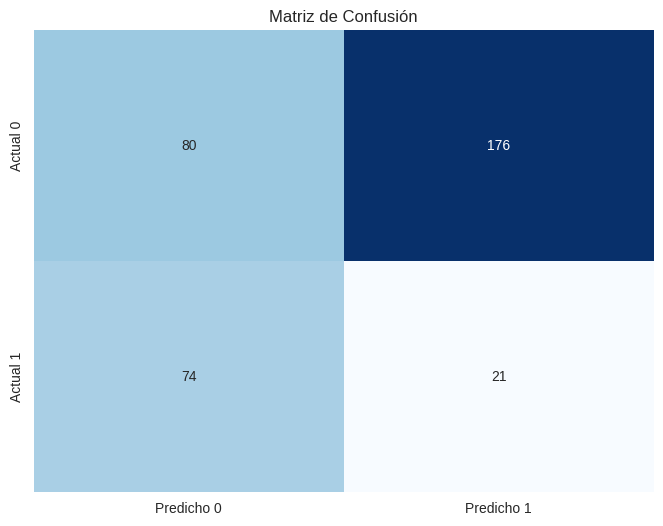

In [226]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Obtener las variables reales y predichas
y_real = gad_lin1_full['Fobia_Social']
y_predicha = gad_lin1_full['Cluster']

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_real, y_predicha)

# Crear un DataFrame para visualizar con seaborn
conf_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicho 0', 'Predicho 1'])

# Visualizar la matriz de confusión con colores
plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, cmap="Blues", fmt='g', cbar=False)
plt.title('Matriz de Confusión')
plt.show()


###Perfiles de Clusters

**Cluster 0:** La respuesta promedio de los estudiantes es de 1.5 a 3 para las preguntas del estudio GAD-7 por lo que suponemos se trata de estudiantes con nivel mayor de Ansiedad General. El grupo esta principalemnte conformado por alumnos de 1, 2 y 4 año de la carrera de medicina. Mientras que el 57% habia cursado la preparatoria de forma presencial y el 48% habian sido clasificados como alumnos con Fobia Social(SPIN). El 97% padecia de ansiedad generalizada (GAD-7) y el 77% con sintomas de ansiedad (BECK).

**Cluster 1:** La respuesta promedio de los estudiantes es de 0 a 1.5 para las preguntas del estudio GAD-7 por lo que suponemos se trata de estudiantes con nivel menor de Ansiedad General. El grupo esta principalemnte conformado por alumnos de 2, 4 y 5 año de la carrera de medicina. Mientras que el 74% habia cursado la preparatoria de forma presencial y el 89% no habian sido clasificados como alumnos con Fobia Social (SPIN). Solo el 4% padecia de ansiedad generalizada (GAD-7) y el 13% con sintomas de ansiedad (BECK).

###Observaciones GAD-7

Empleamos una matriz de confusion para comparar cuantos de los actuales estudiantes clasificados con ansiedad general segun la medida de corte del estudio de GAD-7 habian sido clasificado en el cluster 0 el cual aparentemente agrupa a los estudiantes con mayor nivel de ansiedad y el cluster 1 agrupando a los estudiantes con menor nivel de ansiedad, obteniendo otra vez un numero significativo entre los FP y FN.

Al analizar la importancia de las variables nos encontramos con que P (24%), DR (21%) y MT (20%) contribuyen a determinar al menos en un 65% a que cluster pertenecia el paciente. Por lo que posiblemente un paciente este condicionado a la ansiedad generalizada al tener un alto puntaje en dichos indicadores.

##Analisis de BECK

In [230]:
# Segmentación de la escala BECK
df_beck = df[['Edad', 'Año', 'Línea', 'TPE', 'ACO', 'TBP', 'IDR', 'TMR', 'MR', 'CFA','INT', 'ATZ', 'NRV', 'BLQ', 'TBM',
             'IEI', 'MPC', 'AHG', 'TMM', 'MDO', 'DIG', 'DVS', 'RBF', 'TOTAL BECK','Fobia_Social','Ansiedad_Generalizada', 'Ansiedad_Beck']]

df_beck_2 = df[['Edad', 'Año', 'Línea', 'TPE', 'ACO', 'TBP', 'IDR', 'TMR', 'MR', 'CFA','INT', 'ATZ', 'NRV', 'BLQ', 'TBM',
             'IEI', 'MPC', 'AHG', 'TMM', 'MDO', 'DIG', 'DVS', 'RBF', 'TOTAL BECK']]

In [231]:
#Preparación del dataset
beck_new = df_beck.drop(columns = ["Línea","TOTAL BECK","Fobia_Social","Ansiedad_Generalizada","Ansiedad_Beck"])

scaler = StandardScaler()

beck_new_scaled = pd.DataFrame(scaler.fit_transform(beck_new), columns = beck_new.columns)

In [232]:
# Estandarización de datos
scaler = StandardScaler()

df_beck_scaled = scaler.fit_transform(df_beck_2)

beck_original_scaled = beck_new_scaled
# pd.DataFrame(df_spin_scaled, columns=df_spin_2.columns)

In [233]:
beck_new_scaled.columns

Index(['Edad', 'Año', 'TPE', 'ACO', 'TBP', 'IDR', 'TMR', 'MR', 'CFA', 'INT',
       'ATZ', 'NRV', 'BLQ', 'TBM', 'IEI', 'MPC', 'AHG', 'TMM', 'MDO', 'DIG',
       'DVS', 'RBF'],
      dtype='object')

### Diagrama Silhouette

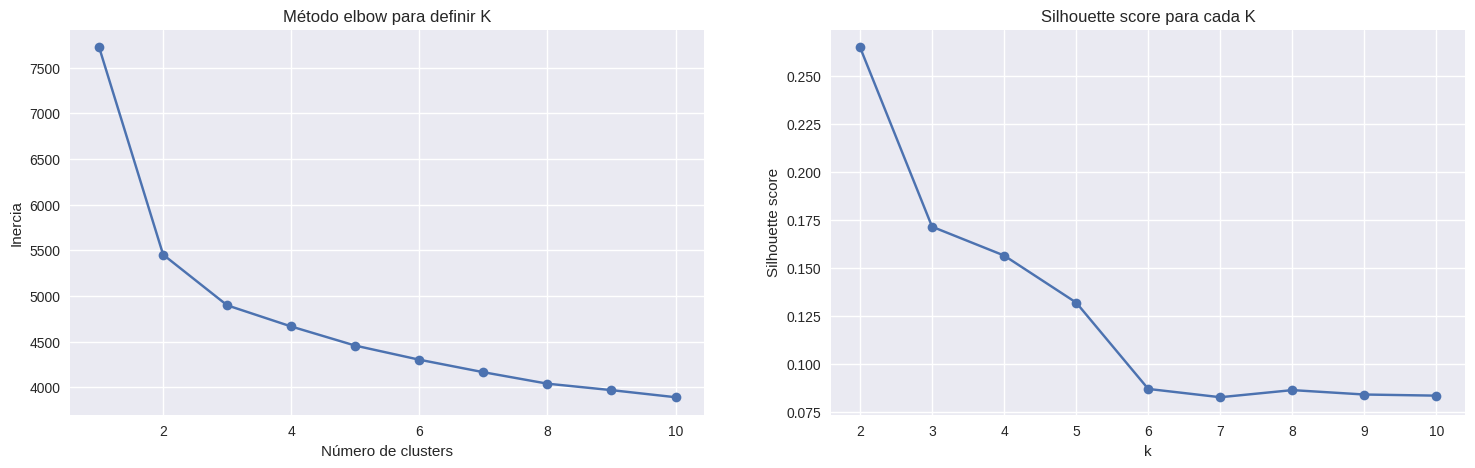

In [234]:
# Inercia y Silhouette score
inertias_beck = []
silhouette_scores = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(beck_original_scaled)
    inertias_beck.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(beck_original_scaled, kmeans.labels_))

# Graficas Elbow y Silhouette score
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), inertias_beck, marker='o')
plt.title('Método elbow para definir K')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette score para cada K')
plt.xlabel('k')
plt.ylabel('Silhouette score')

plt.show()

### PCA

Varianza explicada por componente:
 [0.41244449 0.07940665 0.05544069 0.04846652 0.04410248 0.03920062
 0.03316428 0.03072208 0.02787007 0.0269949  0.02470542 0.02361341
 0.02165965 0.01948237 0.01870607 0.01848797 0.01580133 0.01497227
 0.01405792 0.01188861 0.01054938 0.00826282]

Varianza explicada acumulada:
 [0.41244449 0.49185114 0.54729183 0.59575835 0.63986084 0.67906146
 0.71222574 0.74294782 0.77081789 0.79781279 0.82251821 0.84613162
 0.86779127 0.88727364 0.90597971 0.92446768 0.94026901 0.95524127
 0.96929919 0.9811878  0.99173718 1.        ]


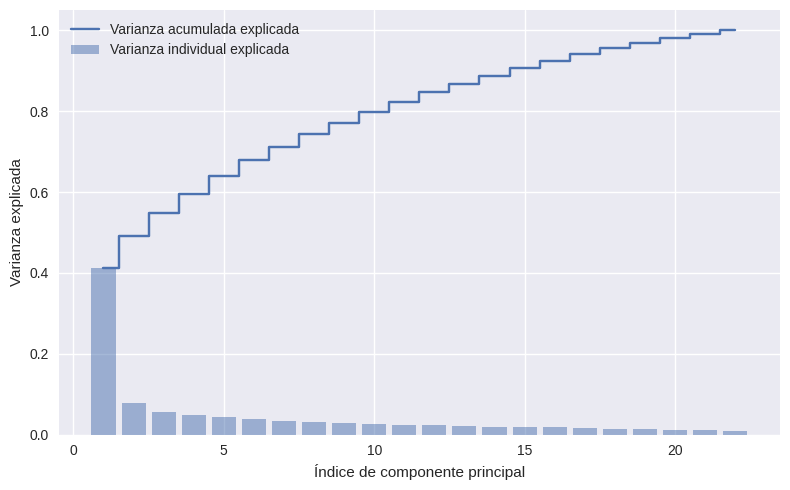

In [235]:
# PCA
pca_full = PCA()
pca_full.fit(beck_original_scaled)

# varianza explicada
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Print varianza por componente
print("Varianza explicada por componente:\n", explained_variance_ratio)

# Print varianza acumulada
print("\nVarianza explicada acumulada:\n", cumulative_explained_variance)

# grafica
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Varianza individual explicada')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Varianza acumulada explicada')
plt.ylabel('Varianza explicada')
plt.xlabel('Índice de componente principal')
plt.legend(loc='best')
plt.tight_layout()

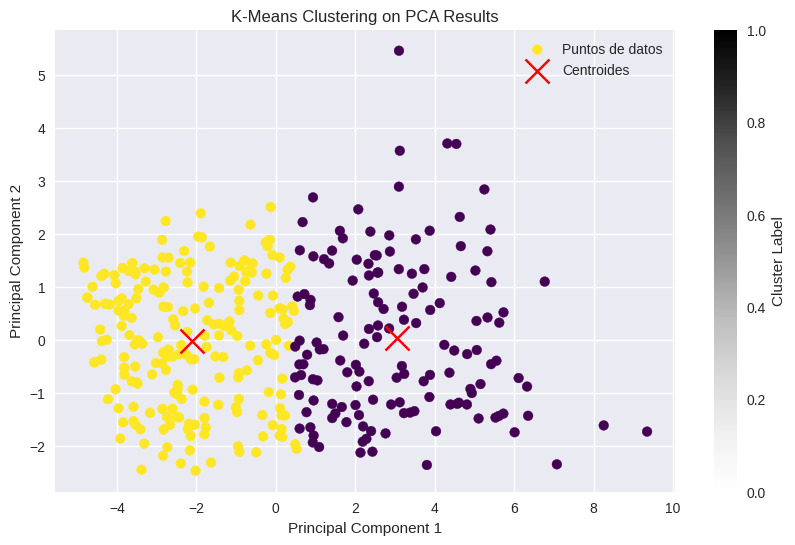

In [236]:
# Aplicar PCA con 10 componentes
pca_beck_linea_1 = PCA(n_components=10)
beck_linea_1_pca = pca_beck_linea_1.fit_transform(beck_original_scaled)

# K means con 2 clusters para linea 1
kmeans_beck_linea_1 = KMeans(n_clusters=2, random_state=42)
clusters_beck_linea_1 = kmeans_beck_linea_1.fit_predict(beck_linea_1_pca)

# Grafica PCA Clusters
plt.figure(figsize=(10, 6))
plt.scatter(beck_linea_1_pca[:, 0], beck_linea_1_pca[:, 1], c=clusters_beck_linea_1, cmap='viridis', marker='o', label='Puntos de datos')
plt.scatter(kmeans_beck_linea_1.cluster_centers_[:, 0], kmeans_beck_linea_1.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Centroides')
plt.title('K-Means Clustering on PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()

###Analisis de Componentes

In [237]:
# Obtener los nombres de las columnas originales
columnas_originales = beck_original_scaled.columns

# Crear un DataFrame con los componentes principales y los nombres de las columnas originales
componentes_principales_df = pd.DataFrame(pca_beck_linea_1.components_, columns=columnas_originales)

# Visualizar los componentes principales y las variables que los componen
print("Componentes Principales:")
print(componentes_principales_df)


Componentes Principales:
       Edad       Año       TPE       ACO       TBP       IDR       TMR  \
0 -0.089715 -0.101485  0.219182  0.171263  0.169825  0.247957  0.241541   
1  0.657439  0.640685 -0.036125 -0.049675 -0.081155  0.109700  0.122020   
2 -0.195207 -0.229718 -0.093219 -0.452333 -0.204691  0.078680  0.312084   
3  0.019610 -0.032423 -0.222779 -0.028143 -0.050389 -0.210003  0.136387   
4  0.051087  0.044951  0.254161 -0.297917 -0.409546 -0.044920 -0.117485   
5  0.058698  0.086230 -0.081590 -0.198007  0.489215 -0.037810  0.004803   
6  0.029123 -0.073870  0.230478 -0.006853  0.457484  0.249314  0.022181   
7 -0.039726 -0.092960 -0.057234  0.202639 -0.153275 -0.190870  0.035146   
8  0.060350 -0.085586 -0.237930  0.634495 -0.202935  0.089874  0.118560   
9 -0.064350 -0.029856 -0.079638 -0.007007 -0.212494  0.039561 -0.050936   

         MR       CFA       INT  ...       BLQ       TBM       IEI       MPC  \
0  0.221431  0.234265  0.256734  ...  0.246911  0.208488  0.261792  0

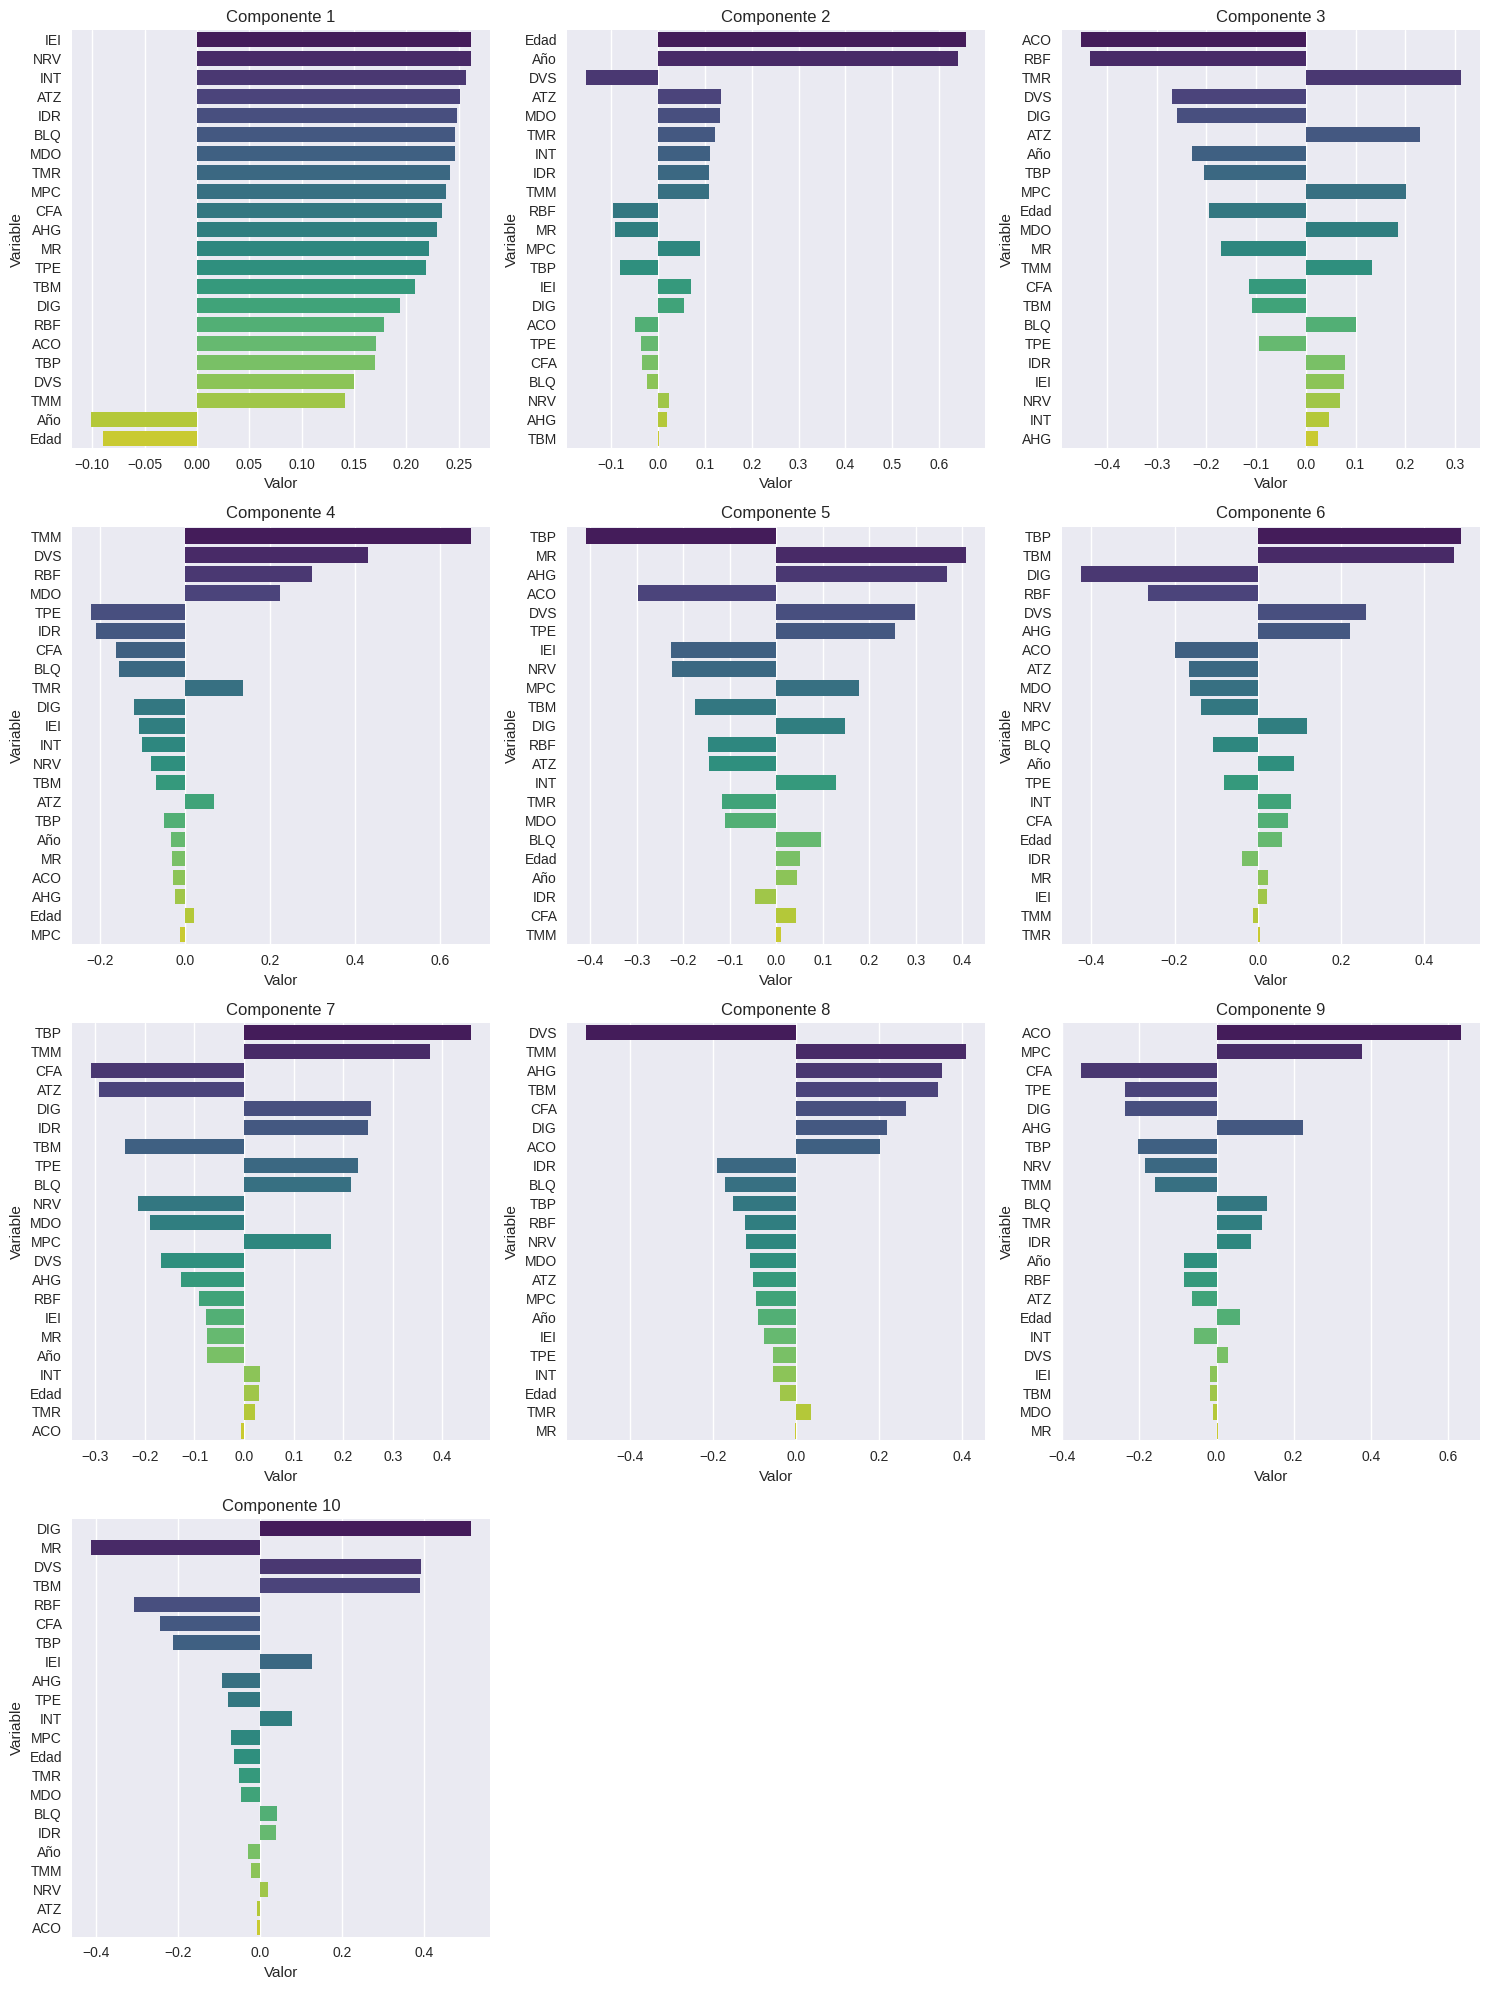

In [239]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener los nombres de las columnas originales
columnas_originales = beck_original_scaled.columns

# Crear un DataFrame con los componentes principales y los nombres de las columnas originales
componentes_principales_df = pd.DataFrame(pca_beck_linea_1.components_, columns=columnas_originales)

# Configurar el tamaño del gráfico
num_componentes = len(componentes_principales_df)
num_filas = (num_componentes - 1) // 3 + 1
plt.figure(figsize=(15, num_filas * 5))

# Iterar sobre cada componente principal y crear un gráfico de barras
for i, componente in enumerate(componentes_principales_df.iterrows(), start=1):
    nombre_componente = f"Componente {i}"

    # Obtener las variables y sus valores
    variables_y_valores = componente[1].items()

    # Crear un DataFrame auxiliar para el gráfico de barras
    df_aux = pd.DataFrame(variables_y_valores, columns=["Variable", "Valor"])

    # Ordenar el DataFrame por los valores absolutos en orden descendente
    df_aux["Valor_abs"] = df_aux["Valor"].abs()
    df_aux = df_aux.sort_values(by="Valor_abs", ascending=False).drop("Valor_abs", axis=1)

    # Crear el gráfico de barras
    plt.subplot(num_filas, 3, i)
    sns.barplot(data=df_aux, x="Valor", y="Variable", palette="viridis")
    plt.title(nombre_componente)

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

### Analisis de Clúster


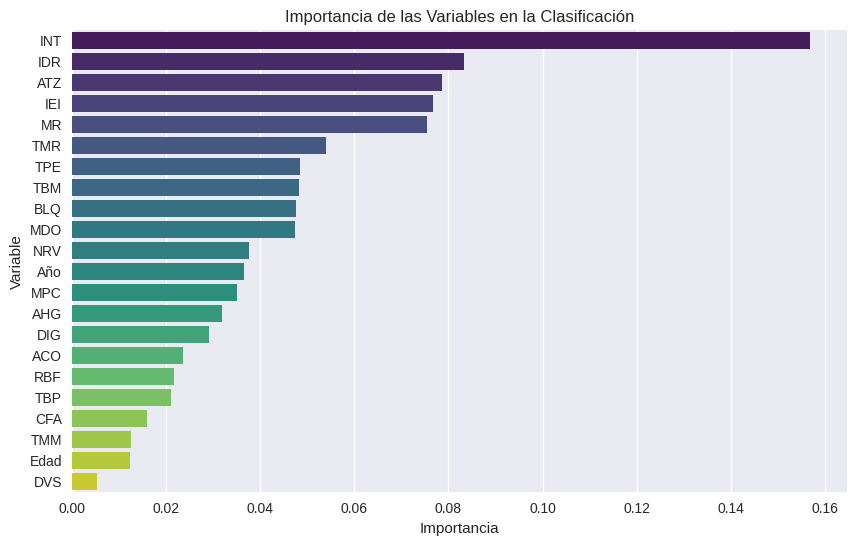

In [240]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


# Definir las variables independientes (X) y la variable dependiente (y)
X = beck_lin1_full.drop(['Cluster','TOTAL BECK'], axis=1)
y = beck_lin1_full['Cluster']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Obtener la importancia de las variables
feature_importance = rf_model.feature_importances_

# Crear un DataFrame con la importancia de las variables
feature_importance_df = pd.DataFrame({'Variable': X.columns, 'Importancia': feature_importance})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)

# Visualizar la importancia de las variables
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Variable', data=feature_importance_df, palette='viridis')
plt.title('Importancia de las Variables en la Clasificación')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()

In [241]:
#incluyendo BECK total
beck_lin1_full = df_beck[['Edad', 'Año', 'Línea', 'TPE', 'ACO', 'TBP', 'IDR', 'TMR', 'MR', 'CFA','INT', 'ATZ', 'NRV', 'BLQ', 'TBM',
             'IEI', 'MPC', 'AHG', 'TMM', 'MDO', 'DIG', 'DVS', 'RBF', 'TOTAL BECK','Fobia_Social','Ansiedad_Generalizada', 'Ansiedad_Beck']]
# Asignar clusters
beck_lin1_full['Cluster'] = clusters_beck_linea_1

beck_lin1_full.head()

,Edad,Año,Línea,TPE,ACO,TBP,IDR,TMR,MR,CFA,...,TMM,MDO,DIG,DVS,RBF,TOTAL BECK,Fobia_Social,Ansiedad_Generalizada,Ansiedad_Beck,Cluster
0,21,5,2,1,0,2,1,1,0,1,...,2,0,0,0,0,10,0,0,0,1
1,25,5,2,0,0,0,1,2,0,2,...,0,0,1,0,0,10,0,0,0,1
2,19,1,1,2,3,2,3,3,3,2,...,1,2,3,1,2,41,1,1,1,0
3,18,1,1,1,0,0,1,1,0,0,...,2,0,0,0,0,9,0,0,0,1
4,19,2,1,2,3,1,1,1,2,2,...,0,0,2,0,0,26,0,0,1,0


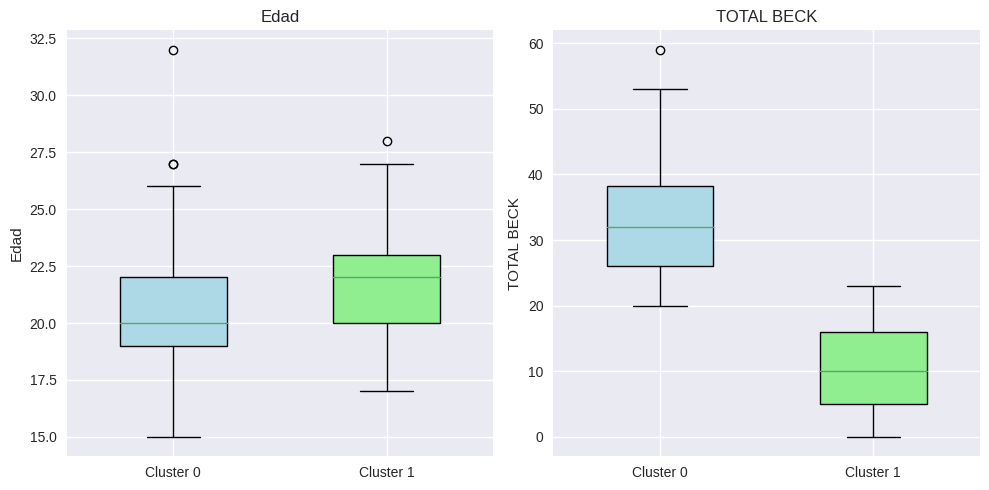

In [242]:
plt.figure(figsize=(10, 5))

columns_to_plot = ['Edad', 'TOTAL BECK']  # columnas para los boxplot

for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(1, 2, i)  # Ajuste de columnas
    # Boxplot Cluster 0
    plt.boxplot([beck_lin1_full[beck_lin1_full['Cluster'] == 0][column]], positions=[0], widths=0.5,
                patch_artist=True, boxprops=dict(facecolor='lightblue'))
    # Boxplot Cluster 1
    plt.boxplot([beck_lin1_full[beck_lin1_full['Cluster'] == 1][column]], positions=[1], widths=0.5,
                patch_artist=True, boxprops=dict(facecolor='lightgreen'))

    #plt.boxplot([spin_lin1_full[spin_lin1_full['Cluster'] == 2][column]], positions=[2], widths=0.5,
                #patch_artist=True, boxprops=dict(facecolor='lightpink'))


    plt.title(column)
    plt.ylabel(column)
    plt.xticks([0, 1], ['Cluster 0', 'Cluster 1'])  #agregar más clusters si es necesario

plt.tight_layout()
plt.show()

###Promedio de las respuestas

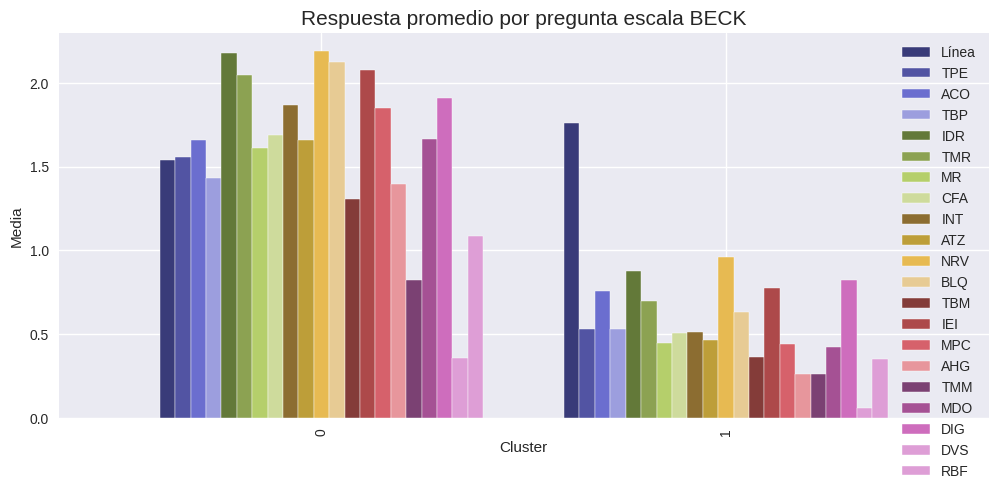

In [243]:
(beck_lin1_full
 .drop(columns=['Edad', 'Año', 'TOTAL BECK','Fobia_Social','Ansiedad_Generalizada', 'Ansiedad_Beck'])
 .groupby('Cluster')
 .mean()
 .plot(kind='bar', figsize=(12, 5), width=0.8, colormap='tab20b', edgecolor='white')
)
plt.title('Respuesta promedio por pregunta escala BECK', fontsize=15)
plt.ylabel('Media')


plt.show()

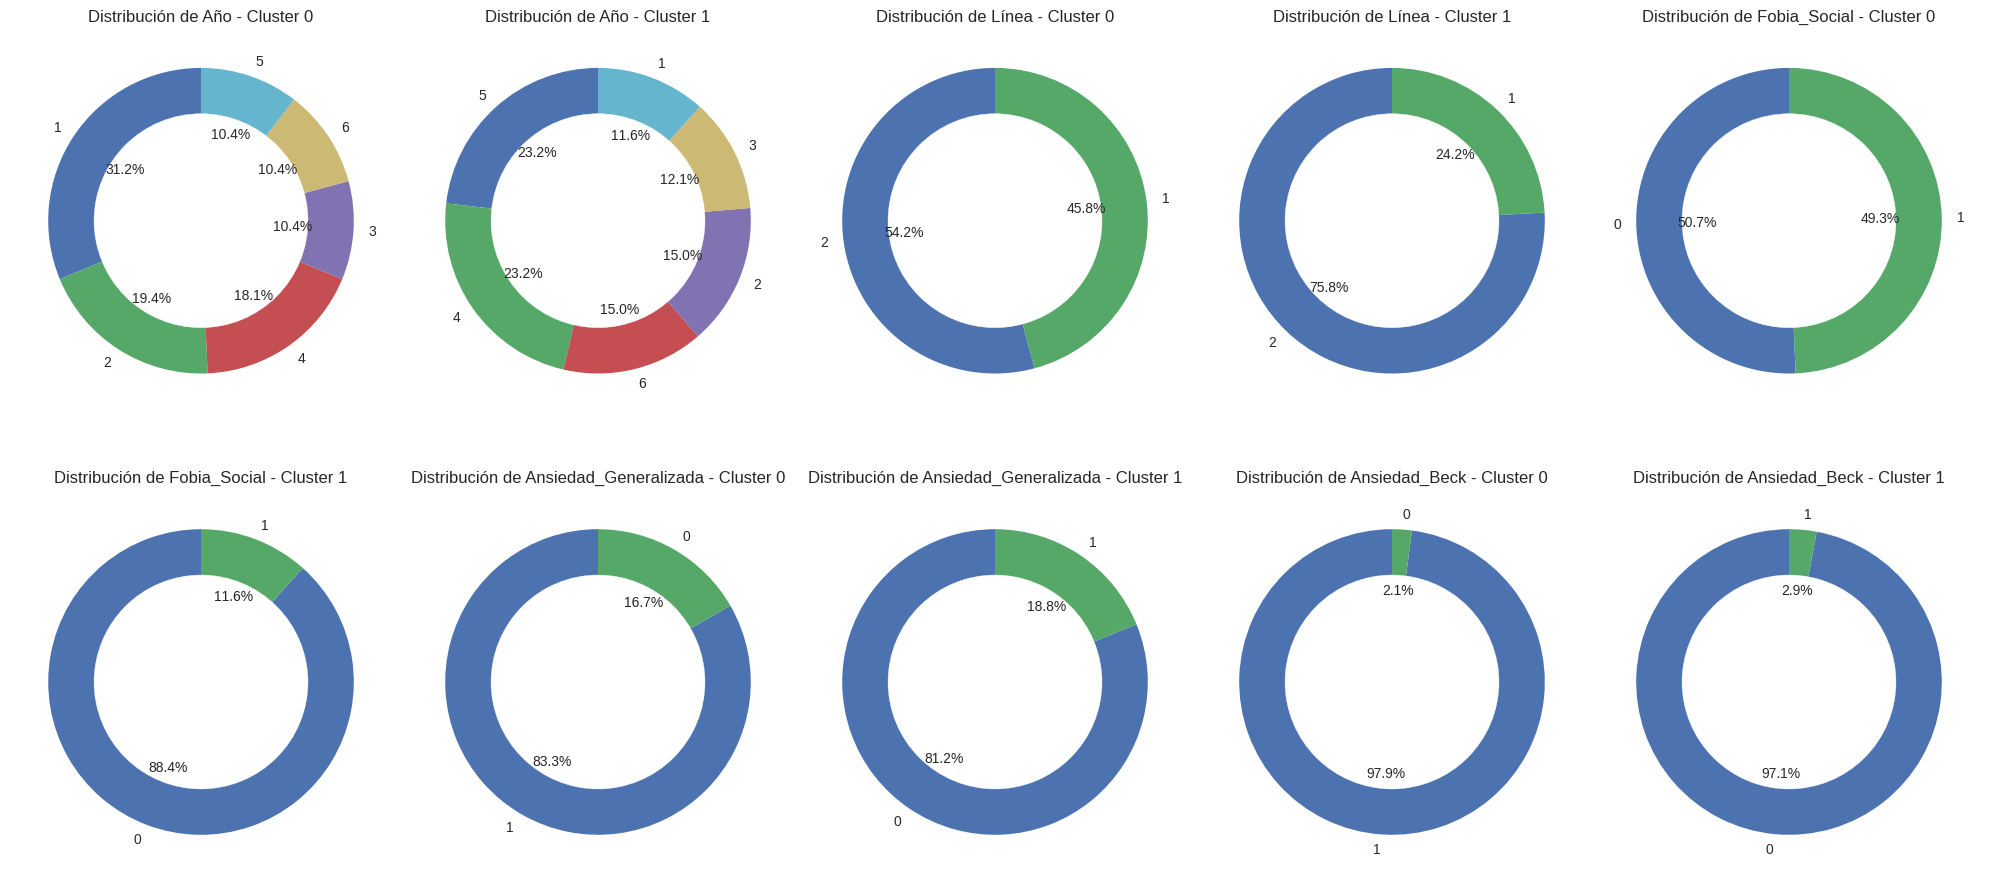

In [244]:
# colores para las categorías de las donas
colors = [
    'lightblue', 'lightgreen', 'lightcoral', 'lightskyblue',
    'lightgrey', 'lightpink', 'lightseagreen', 'lightyellow', 'lightsteelblue'
]

fig, axs = plt.subplots(2, 5, figsize=(20, 10))  # cajones para ajustar si hay más gráficas
axs = axs.flatten()

# categoricas para las donas
columns_to_plot = ['Año', 'Línea','Fobia_Social','Ansiedad_Generalizada', 'Ansiedad_Beck']  # mover aca

for i, column in enumerate(columns_to_plot):
    for cluster in range(len(beck_lin1_full['Cluster'].unique())):
        ax = axs[i * len(beck_lin1_full['Cluster'].unique()) + cluster]
        cluster_counts = beck_lin1_full[beck_lin1_full['Cluster'] == cluster][column].value_counts(normalize=True)
        ax.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90)
        ax.add_artist(plt.Circle((0, 0), 0.7, color='white'))
        ax.set_title(f'Distribución de {column} - Cluster {cluster}')

plt.tight_layout()
plt.show()


###Regresiones

In [246]:
#regresion logit para estimar la probabilidad que tienen de afectar los componentes de BECK a estudiar o no en línea

df['Línea_binary'] = df['Línea'].apply(lambda x: 1 if x == 1 else 0)

# independientes
X = df[['Edad', 'Año', 'TPE', 'ACO', 'TBP', 'IDR', 'TMR', 'MR', 'CFA','INT', 'ATZ', 'NRV', 'BLQ', 'TBM',
             'IEI', 'MPC', 'AHG', 'TMM', 'MDO', 'DIG', 'DVS', 'RBF']]  # Continue with all your independent variables
X = sm.add_constant(X)  # constante para la regresion

# variable dependiente binaria para el logit
y = df['Línea_binary']

# Modelo con errores robustos
model = sm.Logit(y, X).fit(cov_type='HC0')

# Resultados de la regresion
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.199095
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           Línea_binary   No. Observations:                  351
Model:                          Logit   Df Residuals:                      328
Method:                           MLE   Df Model:                           22
Date:                Mon, 26 Feb 2024   Pseudo R-squ.:                  0.6862
Time:                        05:10:51   Log-Likelihood:                -69.882
converged:                       True   LL-Null:                       -222.72
Covariance Type:                  HC0   LLR p-value:                 8.638e-52
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.1239      6.520      4.773      0.000      18.345      43.903
Edad          -1.4684      0.

In [247]:
# Regresión OLS con errores robustos y efectos fijos, ahora se usa como dependiente TOTAL BECK y como independientes las sociodemográficas y la de Línea como efecto fijo

# Dummy para hacer línea una categoríca, efecto fijo
linea_dummies = pd.get_dummies(df['Línea'], drop_first=True, prefix='Línea')

X = df[['Edad', 'Año']]  # Independientes y se agrega abajo la nueva
X = pd.concat([X, linea_dummies], axis=1)

# variable dependiente
y = df['TOTAL BECK'] # aca se agrega
X = sm.add_constant(X)  # Termino constante para la regresión

# OLS con errores robustos
ols_model = sm.OLS(y, X).fit(cov_type='HC0')

# Resultados del modelo
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:             TOTAL BECK   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     8.181
Date:                Mon, 26 Feb 2024   Prob (F-statistic):           2.82e-05
Time:                        05:11:01   Log-Likelihood:                -1379.3
No. Observations:                 351   AIC:                             2767.
Df Residuals:                     347   BIC:                             2782.
Df Model:                           3                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.1427      9.480      2.969      0.0

In [248]:
# GLS con matriz identidad para errores robustos
gls_model = sm.GLS(y, X, sigma=np.eye(len(y))).fit()

# Resultados GLS
print(gls_model.summary())

                            GLS Regression Results                            
Dep. Variable:             TOTAL BECK   R-squared:                       0.068
Model:                            GLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     8.373
Date:                Mon, 26 Feb 2024   Prob (F-statistic):           2.18e-05
Time:                        05:11:23   Log-Likelihood:                -1379.3
No. Observations:                 351   AIC:                             2767.
Df Residuals:                     347   BIC:                             2782.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.1427      8.553      3.290      0.0

###Matriz de Confusion

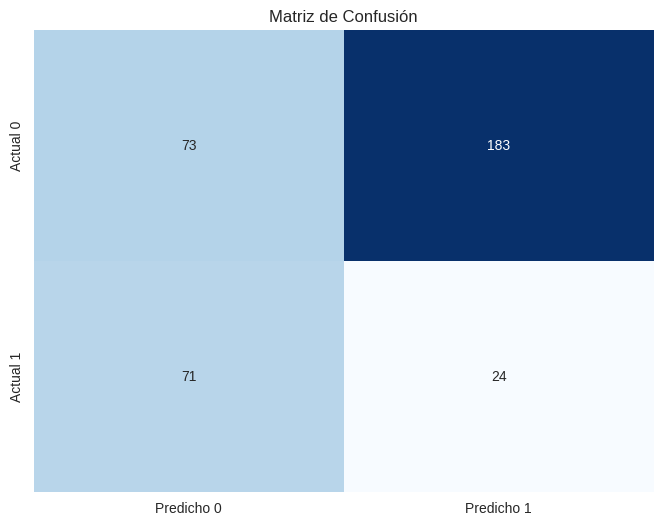

In [249]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Obtener las variables reales y predichas
y_real = beck_lin1_full['Fobia_Social']
y_predicha = beck_lin1_full['Cluster']

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_real, y_predicha)

# Crear un DataFrame para visualizar con seaborn
conf_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicho 0', 'Predicho 1'])

# Visualizar la matriz de confusión con colores
plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, cmap="Blues", fmt='g', cbar=False)
plt.title('Matriz de Confusión')
plt.show()


###Perfiles de Clusters

**Cluster 0:** La respuesta promedio de los estudiantes es de 1 a 3 para las preguntas del estudio BECK por lo que suponemos se trata de estudiantes con nivel mayor de Ansiedad General. El grupo esta principalemnte conformado por alumnos de 1, 2 y 4 año de la carrera de medicina. Mientras que el 54% habia cursado la preparatoria de forma presencial y el 48% habian sido clasificados como alumnos con Fobia Social(SPIN). El 83% padecia de ansiedad generalizada (GAD-7) y el 97% con sintomas de ansiedad (BECK).

**Cluster 1:** La respuesta promedio de los estudiantes es de 0 a 1 para las preguntas del estudio BECK por lo que suponemos se trata de estudiantes con nivel menor de Ansiedad General. El grupo esta principalemnte conformado por alumnos de 2, 4 y 5 año de la carrera de medicina. Mientras que el 75% habia cursado la preparatoria de forma presencial y el 88% no habian sido clasificados como alumnos con Fobia Social (SPIN). Solo el 18% padecia de ansiedad generalizada (GAD-7) y el 3% con sintomas de ansiedad (BECK).

###Observaciones BECK

Empleamos una matriz de confusion para comparar cuantos de los actuales estudiantes clasificados con fobia social segun la medida de corte del estudio de BECK habian sido clasificado en el cluster 0 el cual aparentemente agrupa a los estudiantes con mayor nivel de ansiedad y el cluster 1 agrupando a los estudiantes con menos de nivel de ansiedad nos encontraos con un numero significativo de FP y FN.

Al analizar la importancia de las variables nos encontramos con que INT (16%), IDR (8%) , ATZ (7%) ,IEI (7%) y MR (7%) contribuyen a determinar al menos en un 55% a que cluster pertenecia el paciente. Por lo que posiblemente un paciente este condicionado a la ansiedad al tener un alto puntaje en dichos indicadores.  